In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#file1 = '/Users/–ü–∞–≤–µ–ª/Documents/–ö—É—Ä—Å–æ–≤–æ–π –ø—Ä–æ–µ–∫—Ç/XLS/Countries.csv'
file1 = '/Users/Administrator/Documents/GitHub/Data-Analyst-Project/XLS/Countries.csv'
df = pd.read_csv(file1,
     dtype={'Year': 'int16', 
            'Total_weight_kg': 'float32', 
            'lines': 'float32', 
            'stations': 'float32', 
            'annual_ridership_mill': 'float32',
            'Population_eating_chocolate': 'float32',
            'Cost_kg_USD': 'float32',
            'Urban_population': 'float32',
            'Lifetime': 'float32',
            'GDP_USD': 'float32',
            'Inflation': 'float32',
            'kg_per_person': 'float32',
            'kg_per_GDP': 'float32'})

In [3]:
df

Country  Year  Total_weight_kg availability_of_metro  lines  stations  \
0      Albania  1996         273411.0                    No    NaN       NaN   
1      Albania  1997         222897.0                    No    NaN       NaN   
2      Albania  1998         243309.0                    No    NaN       NaN   
3      Albania  1999         420293.0                    No    NaN       NaN   
4      Albania  2000         303615.0                    No    NaN       NaN   
...        ...   ...              ...                   ...    ...       ...   
3066  Zimbabwe  2012         629857.0                    No    NaN       NaN   
3067  Zimbabwe  2013         556758.0                    No    NaN       NaN   
3068  Zimbabwe  2014         576602.0                    No    NaN       NaN   
3069  Zimbabwe  2015         486762.0                    No    NaN       NaN   
3070  Zimbabwe  2016         269565.0                    No    NaN       NaN   

      annual_ridership_mill  Population_eating_chocolate  Cost_kg_USD  \
0                       NaN                    1557925.0        6.214   
1                       NaN                    1550237.0        6.214   
2                       NaN                    1540864.0        6.214   
3                       NaN                    1530526.0        6.214   
4                       NaN                    1519751.0        6.214   
...                     ...                          ...          ...   
3066                    NaN                    4559903.0        8.215   
3067                    NaN                    4624557.0        8.215   
3068                    NaN                    4688428.0        8.215   
3069                    NaN                    4751674.0        8.215   
3070                    NaN                    4818097.0        8.215   

      Urban_population   Lifetime      GDP_USD  Inflation  kg_per_person  \
0            39.473000  74.112999   985.820007  12.725478         0.1755   
1            40.035000  73.383003   688.820007  33.180275         0.1438   
2            40.601002  74.357002   795.880005  20.642859         0.1579   
3            41.168999  74.568001  1010.369995   0.389438         0.2746   
4            41.741001  74.825996  1101.520020   0.050018         0.1998   
...                ...        ...          ...        ...            ...   
3066         32.834000  55.386002  1238.599976   3.725327         0.1381   
3067         32.653999  56.841999  1362.300049   1.634950         0.1204   
3068         32.504002  58.105999  1372.209961  -0.197785         0.1230   
3069         32.384998  58.988998  1386.420044  -2.430969         0.1024   
3070         32.296001  59.759998  1407.420044  -1.543670         0.0559   

      kg_per_GDP  
0     277.343689  
1     323.592499  
2     305.710693  
3     415.979309  
4     275.632812  
...          ...  
3066  508.523285  
3067  408.689697  
3068  420.199493  
3069  351.092712  
3070  191.531296  

[3071 rows x 15 columns]

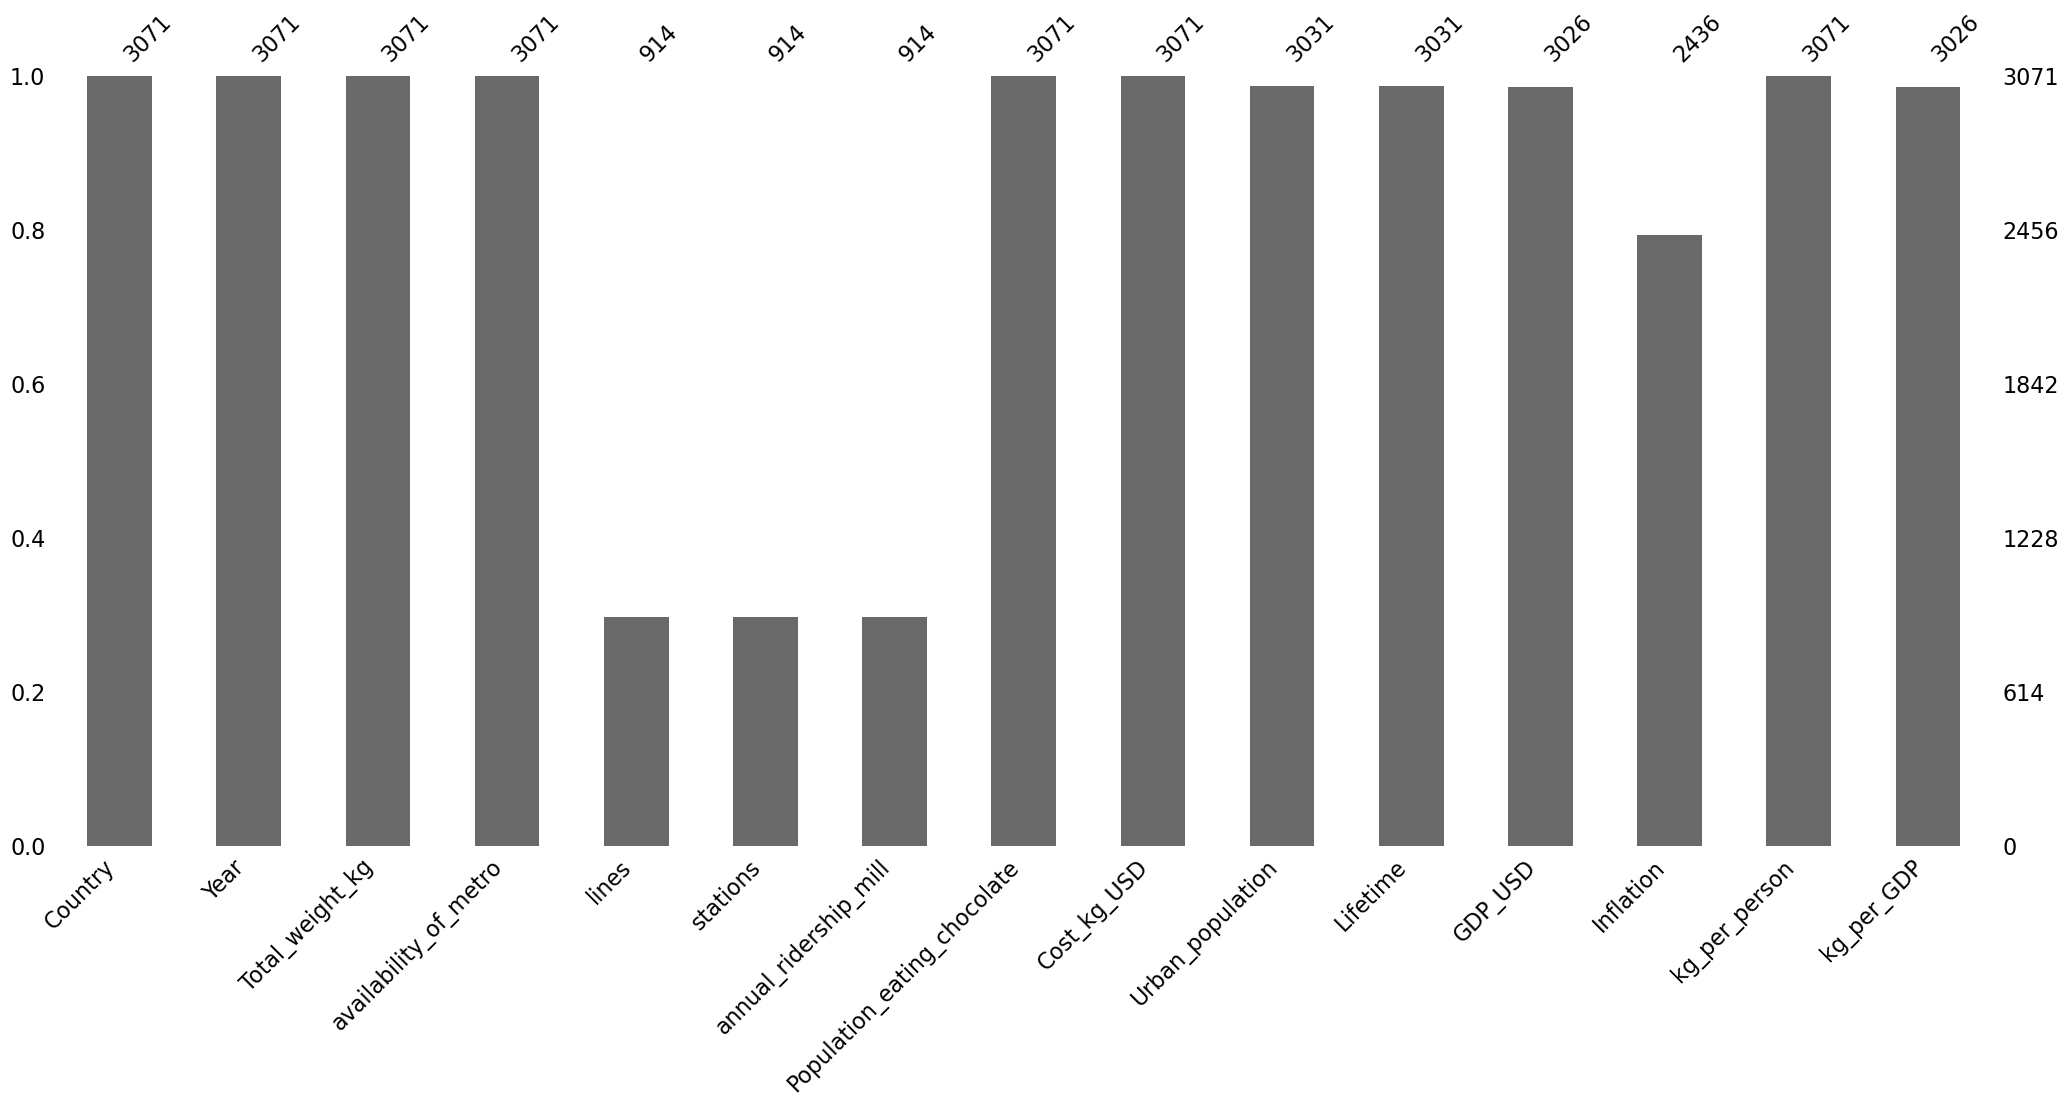

In [4]:
# 1 –≠–¢–ê–ü
# 1.1 –ü—Ä–æ–≤–µ—Ä–∫–∞ –º–∏—Å—Å–∏–Ω–≥–æ–≤
msno.bar(df);

In [5]:
# –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤
# 1.2 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ 'Total_weight_kg' –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç—Ä–∞–Ω–∞–º
country_means = df.groupby('Country')['Total_weight_kg'].transform('mean')
df['Total_weight_kg'] = df['Total_weight_kg'].mask((df['Total_weight_kg'].isna()), country_means)
# 1.3 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ 'Inflation' –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≥–æ–¥—É
inflation_means_by_year = df.groupby('Year')['Inflation'].transform('mean')
df['Inflation'] = df['Inflation'].fillna(inflation_means_by_year)
# 1.4 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ 'Urban_population' –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≥–æ–¥—É
Urban_population_means_by_year = df.groupby('Year')['Urban_population'].transform('mean')
df['Urban_population'] = df['Urban_population'].fillna(Urban_population_means_by_year)
# 1.5 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ 'Lifetime' –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≥–æ–¥—É
Lifetime_means_by_year = df.groupby('Year')['Lifetime'].transform('mean')
df['Lifetime'] = df['Lifetime'].fillna(Lifetime_means_by_year)
# 1.6 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ GDP_USD
replacement_GDP = {
    'Faroe Islands': ('Denmark', 0.015),
    'Mayotte': ('Comoros', 2),
    'Netherlands Antilles': ('Netherlands', 0.005),
    'Sudan': ('Egypt', 0.3),
    'Wallis and Futuna Islands': ('New Zealand', 0.001)}
for country, (source_country, multiplier) in replacement_GDP.items():
    missing_mask = (df['Country'] == country) & (df['GDP_USD'].isna())
    years = df.loc[missing_mask, 'Year'].unique()
    for year in years:
        source_value = df.loc[(df['Country'] == source_country) &  (df['Year'] == year), 'GDP_USD'].values
        if len(source_value) > 0:
            replacement_value = np.float32(source_value[0] * multiplier)
            df.loc[(df['Country'] == country) & 
                  (df['Year'] == year), 'GDP_USD'] = replacement_value
# 1.7 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ kg_per_person: Total_weight_kg / Population_eating_chocolate
mask_kg_per_person = df['kg_per_person'].isna()
df.loc[mask_kg_per_person, 'kg_per_person'] = (
    df.loc[mask_kg_per_person, 'Total_weight_kg'] / 
    df.loc[mask_kg_per_person, 'Population_eating_chocolate']).astype('float32')
# 1.8 –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–∏—Å—Å–∏–Ω–≥–æ–≤ –≤ kg_per_GDP: Total_weight_kg / GDP_USD
mask_kg_per_gdp = df['kg_per_GDP'].isna()
df.loc[mask_kg_per_gdp, 'kg_per_GDP'] = (
    df.loc[mask_kg_per_gdp, 'Total_weight_kg'] / 
    df.loc[mask_kg_per_gdp, 'GDP_USD']).astype('float32')

In [6]:
df.isna().sum()

Country                           0
Year                              0
Total_weight_kg                   0
availability_of_metro             0
lines                          2157
stations                       2157
annual_ridership_mill          2157
Population_eating_chocolate       0
Cost_kg_USD                       0
Urban_population                  0
Lifetime                          0
GDP_USD                           0
Inflation                         0
kg_per_person                     0
kg_per_GDP                        0
dtype: int64

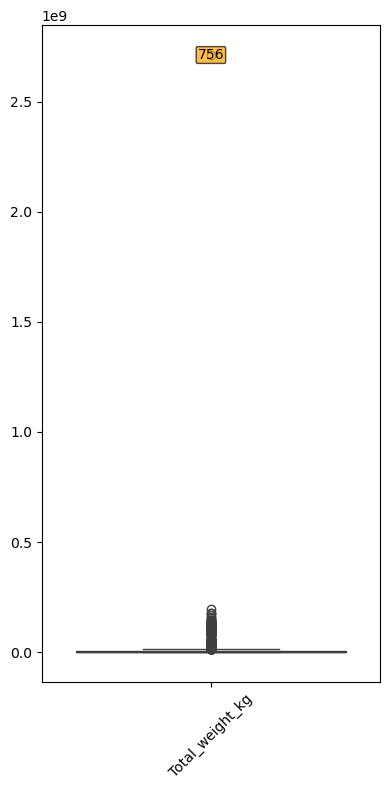

In [7]:
# 2 –≠–¢–ê–ü
# 2.1 –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º
numeric_cols = ['Total_weight_kg']
plt.figure(figsize=(4, 8))
ax = sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –º–µ—Ç–æ–¥–æ–º z-score
def find_outliers_zscore(data, column, threshold=4):
    z_scores = np.abs(stats.zscore(data[column]))
    return data.loc[z_scores > threshold].index.tolist()
for column in numeric_cols:
    outliers_idx = find_outliers_zscore(df, column, threshold=4)
    col_pos = numeric_cols.index(column)
    for idx in outliers_idx:
        value = df.at[idx, column]
        ax.text(col_pos, value, f'{idx}', 
                ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.1', facecolor='orange', alpha=0.7),
                fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [8]:
# 2.1 –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –ø–æ —Å—Ç–æ–ª–±—Ü—É 'Total_weight_kg'
outliers_indices = find_outliers_zscore(df, 'Total_weight_kg', threshold=4)
print(f"–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'Total_weight_kg': {len(outliers_indices)}")
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏:", sorted(outliers_indices))
dfW = df.drop(index=outliers_indices).copy()

–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'Total_weight_kg': 1
–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏: [756]


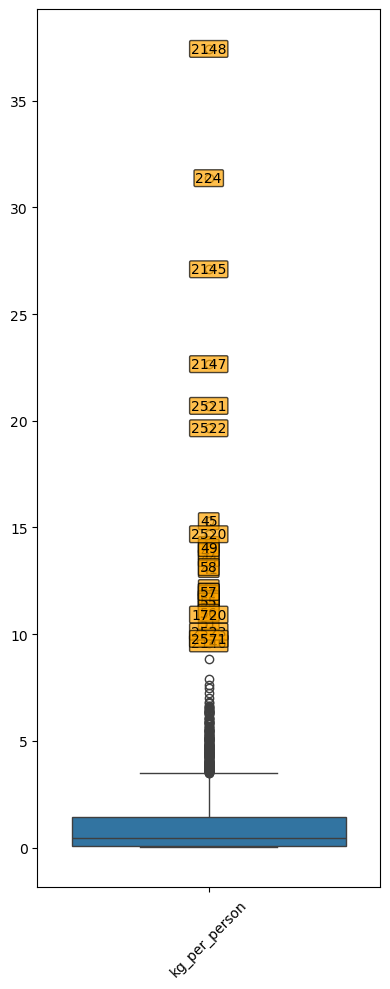

In [9]:
# 2.2 –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ —Å—Ç–æ–ª–±—Ü—É 'kg_per_person'
numeric_cols = ['kg_per_person']
plt.figure(figsize=(4, 10))
ax = sns.boxplot(data=dfW[numeric_cols])
plt.xticks(rotation=45)
def find_outliers_zscore(data, column, threshold=4):
    z_scores = np.abs(stats.zscore(data[column]))
    return data.loc[z_scores > threshold].index.tolist()
for column in numeric_cols:
    outliers_idx = find_outliers_zscore(dfW, column, threshold=4)
    col_pos = numeric_cols.index(column)
    for idx in outliers_idx:
        value = dfW.at[idx, column]
        ax.text(col_pos, value, f'{idx}', 
                ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.1', facecolor='orange', alpha=0.7),
                fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [10]:
# 2.2 –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –ø–æ —Å—Ç–æ–ª–±—Ü—É 'kg_per_person'
outliers_indices = find_outliers_zscore(dfW, 'kg_per_person', threshold=4)
print(f"–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'kg_per_person': {len(outliers_indices)}")
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏:", sorted(outliers_indices))
dfW1 = dfW.drop(index=outliers_indices).copy()

–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'kg_per_person': 29
–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏: [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 224, 1720, 2145, 2146, 2147, 2148, 2520, 2521, 2522, 2523, 2571]


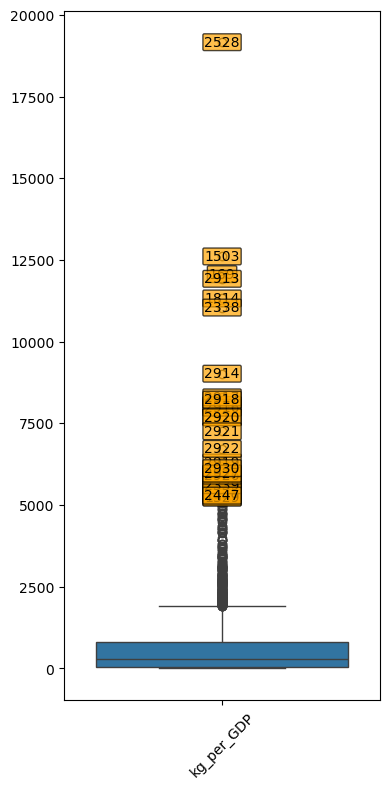

In [11]:
# 2.3 –ü–æ–≤—Ç–æ—Ä–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤
numeric_cols = ['kg_per_GDP']
plt.figure(figsize=(4, 8))
ax = sns.boxplot(data=dfW1[numeric_cols])
plt.xticks(rotation=45)
def find_outliers_zscore(data, column, threshold=4):
    z_scores = np.abs(stats.zscore(data[column]))
    return data.loc[z_scores > threshold].index.tolist()
for column in numeric_cols:
    outliers_idx = find_outliers_zscore(dfW1, column, threshold=4)
    col_pos = numeric_cols.index(column)
    for idx in outliers_idx:
        value = dfW1.at[idx, column]
        ax.text(col_pos, value, f'{idx}', 
                ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.1', facecolor='orange', alpha=0.7),
                fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [12]:
# 2.3 –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –ø–æ —Å—Ç–æ–ª–±—Ü—É 'kg_per_GDP'
outliers_indices = find_outliers_zscore(dfW1, 'kg_per_GDP', threshold=4)
print(f"–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'kg_per_GDP': {len(outliers_indices)}")
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏:", sorted(outliers_indices))
dfW2 = dfW1.drop(index=outliers_indices).copy()

–ù–∞–π–¥–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ 'kg_per_GDP': 33
–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏: [169, 352, 595, 1035, 1036, 1038, 1039, 1124, 1125, 1128, 1129, 1329, 1503, 1537, 1814, 2338, 2339, 2447, 2528, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2926, 2927, 2930]


In [13]:
dfW2

Country  Year  Total_weight_kg availability_of_metro  lines  stations  \
0      Albania  1996         273411.0                    No    NaN       NaN   
1      Albania  1997         222897.0                    No    NaN       NaN   
2      Albania  1998         243309.0                    No    NaN       NaN   
3      Albania  1999         420293.0                    No    NaN       NaN   
4      Albania  2000         303615.0                    No    NaN       NaN   
...        ...   ...              ...                   ...    ...       ...   
3066  Zimbabwe  2012         629857.0                    No    NaN       NaN   
3067  Zimbabwe  2013         556758.0                    No    NaN       NaN   
3068  Zimbabwe  2014         576602.0                    No    NaN       NaN   
3069  Zimbabwe  2015         486762.0                    No    NaN       NaN   
3070  Zimbabwe  2016         269565.0                    No    NaN       NaN   

      annual_ridership_mill  Population_eating_chocolate  Cost_kg_USD  \
0                       NaN                    1557925.0        6.214   
1                       NaN                    1550237.0        6.214   
2                       NaN                    1540864.0        6.214   
3                       NaN                    1530526.0        6.214   
4                       NaN                    1519751.0        6.214   
...                     ...                          ...          ...   
3066                    NaN                    4559903.0        8.215   
3067                    NaN                    4624557.0        8.215   
3068                    NaN                    4688428.0        8.215   
3069                    NaN                    4751674.0        8.215   
3070                    NaN                    4818097.0        8.215   

      Urban_population   Lifetime      GDP_USD  Inflation  kg_per_person  \
0            39.473000  74.112999   985.820007  12.725478         0.1755   
1            40.035000  73.383003   688.820007  33.180275         0.1438   
2            40.601002  74.357002   795.880005  20.642859         0.1579   
3            41.168999  74.568001  1010.369995   0.389438         0.2746   
4            41.741001  74.825996  1101.520020   0.050018         0.1998   
...                ...        ...          ...        ...            ...   
3066         32.834000  55.386002  1238.599976   3.725327         0.1381   
3067         32.653999  56.841999  1362.300049   1.634950         0.1204   
3068         32.504002  58.105999  1372.209961  -0.197785         0.1230   
3069         32.384998  58.988998  1386.420044  -2.430969         0.1024   
3070         32.296001  59.759998  1407.420044  -1.543670         0.0559   

      kg_per_GDP  
0     277.343689  
1     323.592499  
2     305.710693  
3     415.979309  
4     275.632812  
...          ...  
3066  508.523285  
3067  408.689697  
3068  420.199493  
3069  351.092712  
3070  191.531296  

[3008 rows x 15 columns]

In [14]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
output_file = "Results_dfW2.csv"
dfW2.to_csv(output_file, index=False)

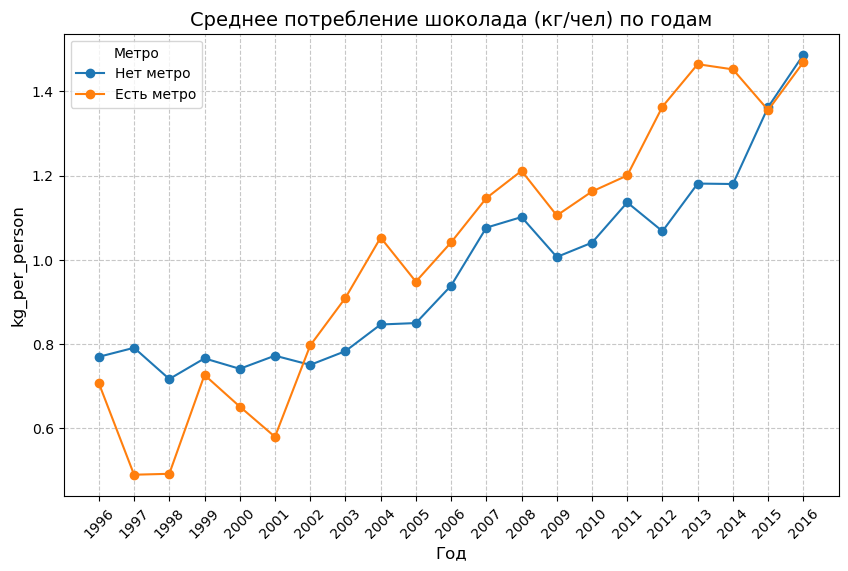

In [15]:
# 2.4 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞ (–∫–≥/—á–µ–ª) –ø–æ –≥–æ–¥–∞–º
result = dfW2.groupby(['Year', 'availability_of_metro'])['kg_per_person'].mean().unstack()
result.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ (–∫–≥/—á–µ–ª) –ø–æ –≥–æ–¥–∞–º', fontsize=14)
plt.xlabel('–ì–æ–¥', fontsize=12)
plt.ylabel('kg_per_person', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='–ú–µ—Ç—Ä–æ', labels=['–ù–µ—Ç –º–µ—Ç—Ä–æ', '–ï—Å—Ç—å –º–µ—Ç—Ä–æ'])
years = result.index
plt.xticks(years, labels=[int(year) for year in years], rotation=45)
plt.show()

In [16]:
# 3 –≠–¢–ê–ü
# –§–æ—Ä–º–∏—Ä—É–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É (H0): –í —Å—Ç—Ä–∞–Ω–∞—Ö —Å –º–µ—Ç—Ä–æ —É—Ä–æ–≤–µ–Ω—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞ —Å—Ä–µ–¥–∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—è —Ç–∞–∫–æ–π –∂–µ –∫–∞–∫ –∏ –±–µ–∑ –º–µ—Ç—Ä–æ.
# –§–æ—Ä–º–∏—Ä—É–µ–º –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É (H1): –í —Å—Ç—Ä–∞–Ω–∞—Ö —Å –º–µ—Ç—Ä–æ —É—Ä–æ–≤–µ–Ω—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞ —Å—Ä–µ–¥–∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—è –Ω–µ —Ç–∞–∫–æ–π –∂–µ –∫–∞–∫ –∏ –±–µ–∑ –º–µ—Ç—Ä–æ.
# 3.1 –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö 'kg_per_person' –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ —Å –º–µ—Ç—Ä–æ
with_metro = dfW2[dfW2['availability_of_metro'] == "Yes"]['kg_per_person']
without_metro = dfW2[dfW2['availability_of_metro'] == "No"]['kg_per_person']
t_statistic, p_value = stats.ttest_ind(with_metro, without_metro)
f"results_ttest: T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_statistic:.4f}, P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.4f}"

'results_ttest: T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 1.3360, P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.1816'

–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
–°—Ç—Ä–∞–Ω—ã —Å –º–µ—Ç—Ä–æ (n=886):
–ú–µ–¥–∏–∞–Ω–∞: 0.61 –∫–≥/—á–µ–ª
–°—Ç—Ä–∞–Ω—ã –±–µ–∑ –º–µ—Ç—Ä–æ (n=2122):
–ú–µ–¥–∏–∞–Ω–∞: 0.34 –∫–≥/—á–µ–ª


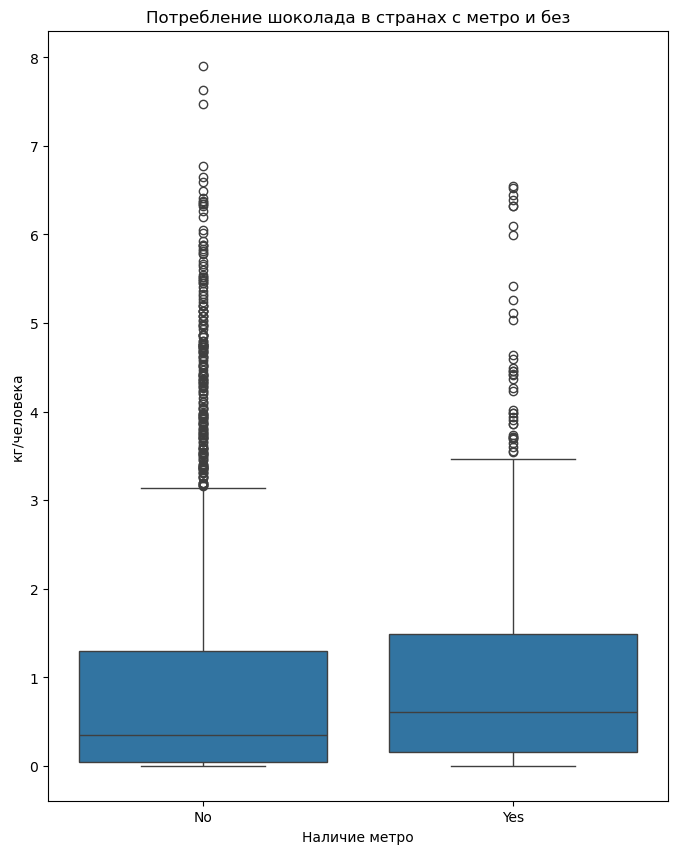


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏:
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 1083137.50
p-value: 0.00000

–í—ã–≤–æ–¥: –û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ –∑–Ω–∞—á–∏–º–æ –≤—ã—à–µ –≤ —Å—Ç—Ä–∞–Ω–∞—Ö —Å –º–µ—Ç—Ä–æ (p < 0.05).


Text(0, 0.5, '–∫–≥/—á–µ–ª–æ–≤–µ–∫–∞')

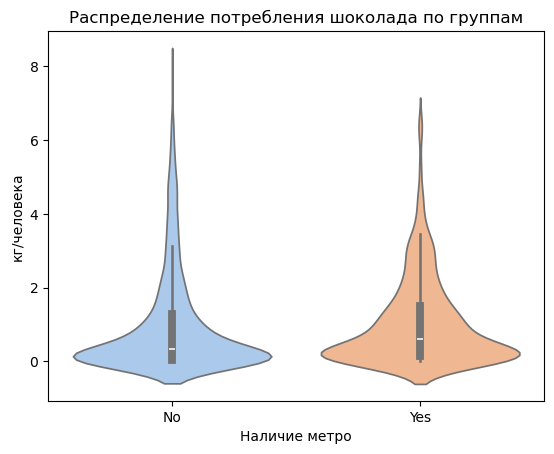

In [17]:
# 3.2 –ù–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥–≤–µ –≥—Ä—É–ø–ø—ã:
with_metro = dfW2[dfW2['availability_of_metro'] == 'Yes']['kg_per_person'].dropna()
without_metro = dfW2[dfW2['availability_of_metro'] == 'No']['kg_per_person'].dropna()
# –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print("–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
print(f"–°—Ç—Ä–∞–Ω—ã —Å –º–µ—Ç—Ä–æ (n={len(with_metro)}):")
print(f"–ú–µ–¥–∏–∞–Ω–∞: {np.median(with_metro):.2f} –∫–≥/—á–µ–ª")
print(f"–°—Ç—Ä–∞–Ω—ã –±–µ–∑ –º–µ—Ç—Ä–æ (n={len(without_metro)}):")
print(f"–ú–µ–¥–∏–∞–Ω–∞: {np.median(without_metro):.2f} –∫–≥/—á–µ–ª")
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 10))
sns.boxplot(x='availability_of_metro', y='kg_per_person', data=dfW2)
plt.title('–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ –≤ —Å—Ç—Ä–∞–Ω–∞—Ö —Å –º–µ—Ç—Ä–æ –∏ –±–µ–∑')
plt.xlabel('–ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ')
plt.ylabel('–∫–≥/—á–µ–ª–æ–≤–µ–∫–∞')
plt.show()
# –¢–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏
stat, p = mannwhitneyu(with_metro, without_metro, alternative='greater')
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏:")
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {stat:.2f}")
print(f"p-value: {p:.5f}")
# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
alpha = 0.05
if p < alpha:
    print("\n–í—ã–≤–æ–¥: –û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ –∑–Ω–∞—á–∏–º–æ –≤—ã—à–µ –≤ —Å—Ç—Ä–∞–Ω–∞—Ö —Å –º–µ—Ç—Ä–æ (p < 0.05).")
else:
    print("\n–í—ã–≤–æ–¥: –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏–º–æ.")
sns.violinplot(x='availability_of_metro', y='kg_per_person', data=dfW2, 
               hue='availability_of_metro', palette='pastel', legend=False)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º')
plt.xlabel('–ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ')
plt.ylabel('–∫–≥/—á–µ–ª–æ–≤–µ–∫–∞')

In [18]:
# 3.3 C—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö (Cohen‚Äôs d)
with_metro = dfW2[dfW2['availability_of_metro'] == 'Yes']['kg_per_person'].dropna()
without_metro = dfW2[dfW2['availability_of_metro'] == 'No']['kg_per_person'].dropna()
mean_yes, mean_no = with_metro.mean(), without_metro.mean()
std_pooled = np.sqrt((with_metro.std()**2 + without_metro.std()**2) / 2)
cohen_d = (mean_yes - mean_no) / std_pooled
print(f"Cohen‚Äôs d: {cohen_d:.3f}")

Cohen‚Äôs d: 0.055


In [19]:
# 4 –≠–¢–ê–ü
# –†–ï–ì–†–ï–°–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó
# –ü—Ä–∏–Ω–∏–º–∞–µ–º outcome - kg_per_person; predictors - availability_of_metro, Population_eating_chocolate, GDP_USD, Inflation, annual_ridership_mill, lines

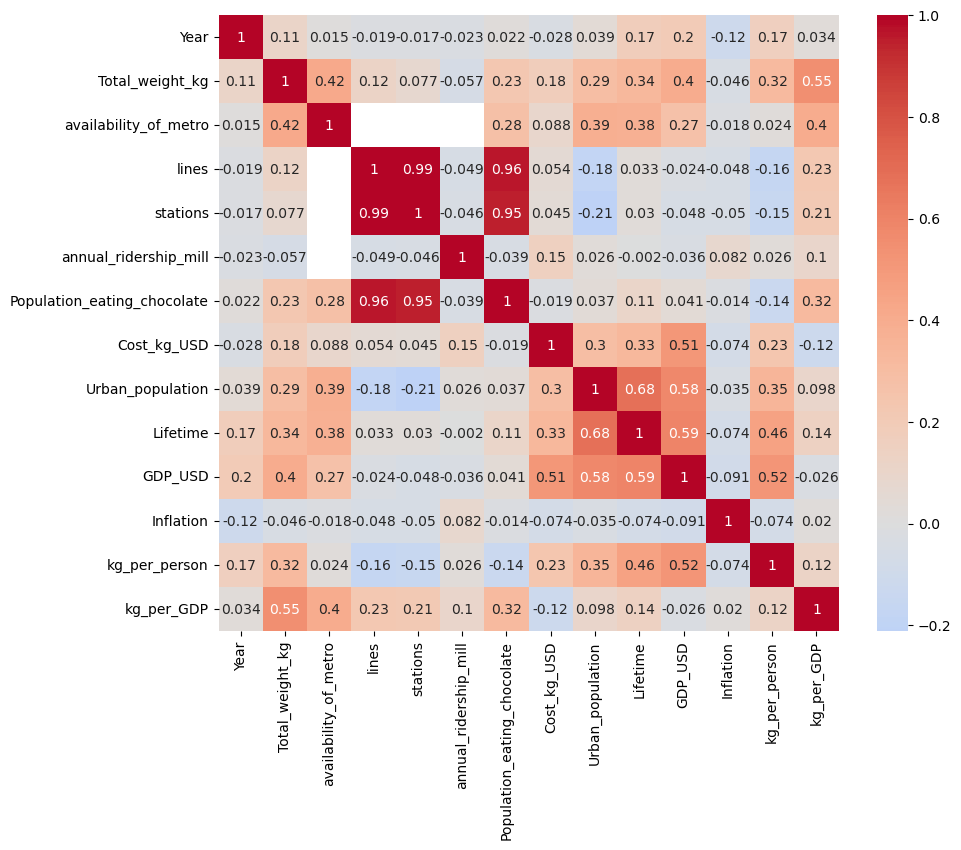

In [20]:
# 4.1 –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
dfK1 = dfW2[['Year','Total_weight_kg', 'availability_of_metro', 'lines',
       'stations', 'annual_ridership_mill', 'Population_eating_chocolate',
       'Cost_kg_USD', 'Urban_population', 'Lifetime', 'GDP_USD', 'Inflation',
       'kg_per_person', 'kg_per_GDP']].copy()
dfK1['availability_of_metro'] = dfK1['availability_of_metro'].map({'Yes': 1, 'No': 0})
# 4.2 –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
correlation_matrix = dfK1.corr().round(3)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [21]:
# 4.3 –ú–æ–¥–µ–ª—å —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º GDP
dfK1['log_GDP'] = np.log(dfK1['GDP_USD'])
dfK1['sqrt_kg_per_person'] = np.sqrt(dfK1['kg_per_person'])
model = smf.ols('sqrt_kg_per_person ~ availability_of_metro + log_GDP + Lifetime + Urban_population + Cost_kg_USD + C(Year)', 
                data=dfK1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_kg_per_person   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     98.68
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:36:33   Log-Likelihood:                -1878.0
No. Observations:                3008   AIC:                             3808.
Df Residuals:                    2982   BIC:                             3964.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.0760      0.090    -23.098      0.000      -2.252      -1.900
C(Year)[T.1997]          -0.0142      0.063     -0.224      0.823      -0.138       0.110
C(Year)[T.1998]          -0.0236      0.062     -0.380      0.704      -0.145       0.098
C(Year)[T.1999]          -0.0087      0.061     -0.143      0.886      -0.127       0.110
C(Year)[T.2000]          -0.0026      0.060     -0.043      0.966      -0.119       0.114
C(Year)[T.2001]           0.0215      0.059      0.363      0.717      -0.095       0.138
C(Year)[T.2002]           0.0277      0.059      0.467      0.640      -0.088       0.144
C(Year)[T.2003]           0.0292      0.059      0.497      0.619      -0.086       0.144
C(Year)[T.2004]           0.0374      0.058      0.643      0.520      -0.077       0.151
C(Year)[T.2005]           0.0054      0.058      0.093      0.926      -0.108       0.119
C(Year)[T.2006]           0.0139      0.058      0.240      0.810      -0.100       0.127
C(Year)[T.2007]           0.0383      0.058      0.661      0.509      -0.075       0.152
C(Year)[T.2008]           0.0266      0.058      0.459      0.646      -0.087       0.140
C(Year)[T.2009]          -0.0043      0.058     -0.074      0.941      -0.118       0.109
C(Year)[T.2010]          -0.0123      0.058     -0.212      0.832      -0.126       0.101
C(Year)[T.2011]          -0.0015      0.058     -0.025      0.980      -0.115       0.112
C(Year)[T.2012]           0.0072      0.058      0.123      0.902      -0.107       0.121
C(Year)[T.2013]           0.0323      0.059      0.551      0.581      -0.082       0.147
C(Year)[T.2014]           0.0141      0.059      0.240      0.810      -0.101       0.129
C(Year)[T.2015]           0.0598      0.059      1.011      0.312      -0.056       0.176
C(Year)[T.2016]           0.0907      0.062      1.458      0.145      -0.031       0.213
availability_of_metro    -0.2578      0.020    -12.857      0.000      -0.297      -0.219
log_GDP                   0.1962      0.011     18.511      0.000       0.175       0.217
Lifetime                  0.0162      0.002      9.624      0.000       0.013       0.019
Urban_population          0.0005      0.001      0.791      0.429      -0.001       0.002
Cost_kg_USD               0.0091      0.003      2.744      0.006       0.003       0.016
==============================================================================
Omnibus:                      286.400   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.103
Skew:                           0.737   Prob(JB):                     7.27e-91
Kurtosis:                       4.068   Cond. No.                     2.42e+03
==============================================================================

1. –û–±—ä—è—Å–Ω—è—é—â–∞—è —Å–∏–ª–∞ –º–æ–¥–µ–ª–∏:
R¬≤ = 0.471 (47.1% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é).
–°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π R¬≤ = 0.467 (—É—á—Ç–µ–Ω–æ —á–∏—Å–ª–æ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤).
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 109.5 (p < 0.001) ‚Äî –º–æ–¥–µ–ª—å –≤ —Ü–µ–ª–æ–º –∑–Ω–∞—á–∏–º–∞.

2. –ö–ª—é—á–µ–≤—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ (availability_of_metro)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: -0.2541 (p < 0.001).
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –í –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ (–≤ –∫–æ—Ä–Ω–µ –∏–∑ –∫–≥/—á–µ–ª) –Ω–∏–∂–µ –Ω–∞ ~0.25 –µ–¥–∏–Ω–∏—Ü –ø—Ä–∏ –ø—Ä–æ—á–∏—Ö —Ä–∞–≤–Ω—ã—Ö.
–°–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å GLM-—Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π (–≥–æ—Ä–æ–¥–∞ —Å –º–µ—Ç—Ä–æ –ø–æ—Ç—Ä–µ–±–ª—è—é—Ç –º–µ–Ω—å—à–µ).
–õ–æ–≥–∞—Ä–∏—Ñ–º –í–í–ü (log_GDP)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.1994 (p < 0.001).
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –í–í–ü –Ω–∞ 1% —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º sqrt_kg_per_person –Ω–∞ ~0.2 –µ–¥–∏–Ω–∏—Ü—ã.
–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å–∏–ª—å–Ω—É—é —Å–≤—è–∑—å —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ –±–ª–∞–≥–æ–ø–æ–ª—É—á–∏—è –∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞.
–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ (Lifetime)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0156 (p < 0.001).
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –ö–∞–∂–¥—ã–π –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –≥–æ–¥ –∂–∏–∑–Ω–∏ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –Ω–∞ ~0.016 –µ–¥–∏–Ω–∏—Ü.
–¶–µ–Ω–∞ —à–æ–∫–æ–ª–∞–¥–∞ (Cost_kg_USD)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0092 (p = 0.004).
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –†–æ—Å—Ç —Ü–µ–Ω—ã –Ω–∞ 1 USD —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ. –≠—Ç–æ –Ω–µ–æ—á–µ–≤–∏–¥–Ω–æ ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, —Ü–µ–Ω–∞ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –∫–∞—á–µ—Å—Ç–≤–æ–º –∏–ª–∏ –ø—Ä–µ–º–∏–∞–ª—å–Ω–æ—Å—Ç—å—é –ø—Ä–æ–¥—É–∫—Ç–∞.

3. –ù–µ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ì–æ–¥—ã (C(Year))
–ù–∏ –æ–¥–∏–Ω –≥–æ–¥ –Ω–µ –ø–æ–∫–∞–∑–∞–ª –∑–Ω–∞—á–∏–º–æ–≥–æ –≤–ª–∏—è–Ω–∏—è (–≤—Å–µ p > 0.05).
–í—ã–≤–æ–¥: –í—Ä–µ–º–µ–Ω–Ω–æ–π —Ç—Ä–µ–Ω–¥ –Ω–µ –æ–±—ä—è—Å–Ω—è–µ—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è.
–î–æ–ª—è –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ –Ω–∞—Å–µ–ª–µ–Ω–∏—è (Urban_population)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0007 (p = 0.254).
–í –æ—Ç–ª–∏—á–∏–µ –æ—Ç GLM, –∑–¥–µ—Å—å —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è –Ω–µ–∑–Ω–∞—á–∏–º–∞. –í–æ–∑–º–æ–∂–Ω–æ, –µ—ë —ç—Ñ—Ñ–µ–∫—Ç –ø–µ—Ä–µ–∫—Ä—ã–≤–∞–µ—Ç—Å—è –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, GDP).

4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–æ–ø—É—â–µ–Ω–∏–π –º–æ–¥–µ–ª–∏:
–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è:
Durbin-Watson = 0.250 (–∑–Ω–∞—á–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ –∫ 0 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞—Ç–∫–æ–≤).
–ü—Ä–æ–±–ª–µ–º–∞: –ù–∞—Ä—É—à–µ–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—à–∏–±–æ–∫. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª–∏, —É—á–∏—Ç—ã–≤–∞—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É (–Ω–∞–ø—Ä–∏–º–µ—Ä, ARIMA).
–ù–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤:
Jarque-Bera (JB) = 447.746 (p ‚âà 0) ‚Äî –æ—Å—Ç–∞—Ç–∫–∏ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã.
Skew = 0.738 (–ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è), Kurtosis = 4.138 (—Ç—è–∂—ë–ª—ã–µ —Ö–≤–æ—Å—Ç—ã).
–†–µ—à–µ–Ω–∏–µ: –†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–º–µ—Å—Ç–æ –∫–æ—Ä–Ω—è).

–ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å:
Cond. No. = 2.35e+03 (–≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ) ‚Äî –≤–æ–∑–º–æ–∂–Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å.
–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: –ü—Ä–æ–≤–µ—Ä–∏—Ç—å VIF (Variance Inflation Factor) –¥–ª—è –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤.

5. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å GLM-—Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π:
–°—Ö–æ–¥—Å—Ç–≤–∞:
–ú–µ—Ç—Ä–æ, GDP –∏ Lifetime –∑–Ω–∞—á–∏–º—ã –≤ –æ–±–µ–∏—Ö –º–æ–¥–µ–ª—è—Ö.
–ì–æ–¥—ã –Ω–µ–∑–Ω–∞—á–∏–º—ã.

–†–∞–∑–ª–∏—á–∏—è:
–í OLS —Ü–µ–Ω–∞ —à–æ–∫–æ–ª–∞–¥–∞ (Cost_kg_USD) –∑–Ω–∞—á–∏–º–∞, –∞ –≤ GLM ‚Äî –Ω–µ—Ç.
–í GLM —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è (Urban_population) –∑–Ω–∞—á–∏–º–∞, –∞ –≤ OLS ‚Äî –Ω–µ—Ç.

–ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
–ì–ª–∞–≤–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è:
üìâ –ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–≤–æ–∑–º–æ–∂–Ω–æ, –∏–∑-–∑–∞ —É—Ä–±–∞–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –æ–±—Ä–∞–∑–∞ –∂–∏–∑–Ω–∏).
üìà –í–í–ü –∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–±–æ–≥–∞—Ç—ã–µ –∏ –∑–¥–æ—Ä–æ–≤—ã–µ –æ–±—â–µ—Å—Ç–≤–∞ –µ–¥—è—Ç –±–æ–ª—å—à–µ —à–æ–∫–æ–ª–∞–¥–∞).
üí∞ –¶–µ–Ω–∞ —à–æ–∫–æ–ª–∞–¥–∞ –∏–º–µ–µ—Ç —Å–ª–∞–±—ã–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç (–ø–∞—Ä–∞–¥–æ–∫—Å: —á–µ–º –¥–æ—Ä–æ–∂–µ, —Ç–µ–º –±–æ–ª—å—à–µ –µ–¥—è—Ç).

–ü—Ä–æ–±–ª–µ–º—ã –º–æ–¥–µ–ª–∏:
–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∏ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤ —Ç—Ä–µ–±—É—é—Ç –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ –º–µ—Ç–æ–¥–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–µ—Ö–æ–¥ –∫ –≤—Ä–µ–º–µ–Ω–Ω—ã–º —Ä—è–¥–∞–º –∏–ª–∏ –æ–±–æ–±—â—ë–Ω–Ω—ã–º –º–æ–¥–µ–ª—è–º).
–í–æ–∑–º–æ–∂–Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å (–ø—Ä–æ–≤–µ—Ä–∏—Ç—å VIF).
–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

–î–æ–±–∞–≤–∏—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ª–∞–≥–∏ –∏–ª–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã –¥–ª—è —É—á—ë—Ç–∞ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.
–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–≤–∞–¥—Ä–∞—Ç GDP).
–£—Ç–æ—á–Ω–∏—Ç—å —Ä–æ–ª—å —Ü–µ–Ω—ã: –ø–æ—á–µ–º—É –æ–Ω–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ?
–ü—Ä–∏–º–µ—Ä –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –¥–ª—è –ø–æ–ª–∏—Ç–∏–∫–∏:
–î–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —à–æ–∫–æ–ª–∞–¥–∞ –≤–∞–∂–Ω–æ —Ä–∞–∑–≤–∏–≤–∞—Ç—å —ç–∫–æ–Ω–æ–º–∏–∫—É (GDP) –∏ –∑–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ (Lifetime). –ü—Ä–∏ —ç—Ç–æ–º –≤ –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –∫–∞–º–ø–∞–Ω–∏–∏ –ø–æ –ø–æ–ø—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ —à–æ–∫–æ–ª–∞–¥–∞ –∫–∞–∫ —á–∞—Å—Ç–∏ –∑–¥–æ—Ä–æ–≤–æ–≥–æ —Ä–∞—Ü–∏–æ–Ω–∞.

In [22]:
# 4.4 –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
print("\n–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:")
shapiro_test = stats.shapiro(dfK1['sqrt_kg_per_person'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}')
print(f'p-value: {shapiro_test.pvalue:.10f}')


–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:
Shapiro-Wilk Test Statistic: 0.9196
p-value: 0.0000000000



–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:


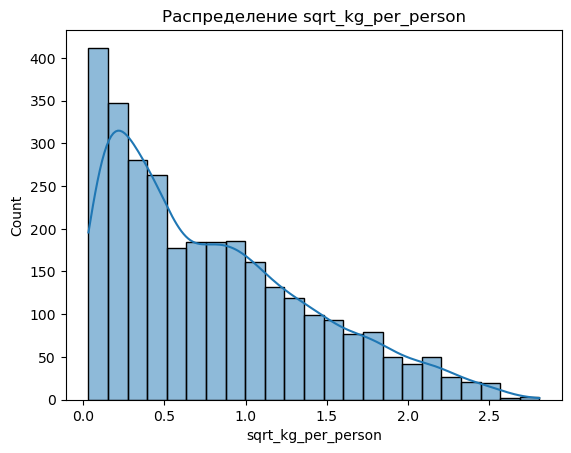

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: 0.8118560314178467


In [23]:
# 4.5 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏
print("\n–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:")
sns.histplot(data=dfK1, x="sqrt_kg_per_person", kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ sqrt_kg_per_person')
plt.show()
skewness = dfK1['sqrt_kg_per_person'].skew()
print(f'–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {skewness}')

1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞:
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ—Å—Ç–∞: 0.9225 (—á–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –±–ª–∏–∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É).
p-value: 0.0000000000 (–∫—Ä–∞–π–Ω–µ –∑–Ω–∞—á–∏–º–æ).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
–ì–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è (p < 0.05). –ó–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (sqrt_kg_per_person) –∏–º–µ–µ—Ç –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

2. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ (Skewness):
–ó–Ω–∞—á–µ–Ω–∏–µ: 0.805 (–ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç –¥–ª–∏–Ω–Ω—ã–π –ø—Ä–∞–≤—ã–π —Ö–≤–æ—Å—Ç (–±–æ–ª—å—à–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π).

–≠—Ç–æ —Ç–∏–ø–∏—á–Ω–æ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–∏: –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω—ã —Å–ª–µ–≤–∞, –Ω–æ –µ—Å—Ç—å "–≤—ã–±—Ä–æ—Å—ã" —Å –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ–º.

3. –°–≤—è–∑—å —Å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º:
–í OLS-–º–æ–¥–µ–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ —Ç–∞–∫–∂–µ –±—ã–ª–∏ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏ (Jarque-Bera: p ‚âà 0, skew = 0.738).

–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—É: –Ω–∞—Ä—É—à–µ–Ω–æ –æ–¥–Ω–æ –∏–∑ –∫–ª—é—á–µ–≤—ã—Ö –¥–æ–ø—É—â–µ–Ω–∏–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –æ—à–∏–±–æ–∫).

4. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:

–ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ (log(kg_per_person)) –≤–º–µ—Å—Ç–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –∫–æ—Ä–Ω—è ‚Äî —á–∞—Å—Ç–æ –ª—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –ø—Ä–∞–≤–æ-—Å–∫–æ—à–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è.

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ robust-–º–µ—Ç–æ–¥–æ–≤:

–ü—Ä–∏–º–µ–Ω–∏—Ç—å —Ä–æ–±–∞—Å—Ç–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ (Huber-White) –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ –≤—ã–≤–æ–¥–æ–≤ –≤ OLS.

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞: –æ–±–æ–±—â—ë–Ω–Ω—ã–µ –ª–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏ (GLM) —Å –ø–æ–¥—Ö–æ–¥—è—â–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≥–∞–º–º–∞ –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö).

–ù–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã:

–ï—Å–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –Ω–µ –ø–æ–º–æ–≥–∞—é—Ç, —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é (—É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏).

–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤:

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –≤ –ø—Ä–∞–≤–æ–º —Ö–≤–æ—Å—Ç–µ ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏–µ —Ä–µ–≥–∏–æ–Ω—ã/–≥–æ–¥—ã, —Ç—Ä–µ–±—É—é—â–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è.

–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥:
–ó–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è sqrt_kg_per_person –∏–º–µ–µ—Ç –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω–µ–π –∞—Å–∏–º–º–µ—Ç—Ä–∏–µ–π, —á—Ç–æ —Å—Ç–∞–≤–∏—Ç –ø–æ–¥ —Å–æ–º–Ω–µ–Ω–∏–µ –≤–∞–ª–∏–¥–Ω–æ—Å—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö OLS-–æ—Ü–µ–Ω–æ–∫. –î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –Ω–∞–¥—ë–∂–Ω–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ:
‚úÖ –ü—Ä–∏–º–µ–Ω–∏—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–ª–∏ –¥—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.
‚úÖ –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–æ–±–∞—Å—Ç–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∏–ª–∏ GLM.
‚úÖ –ò—Å–∫–ª—é—á–∏—Ç—å/–æ–±—ä—è—Å–Ω–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã, –µ—Å–ª–∏ –æ–Ω–∏ –∏—Å–∫–∞–∂–∞—é—Ç –∫–∞—Ä—Ç–∏–Ω—É.

–ü—Ä–∏–º–µ—Ä:
–ü–æ—Å–ª–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–≤–µ—Ä—å—Ç–µ —Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ —Å–Ω–æ–≤–∞. –ï—Å–ª–∏ p-value —Å—Ç–∞–Ω–µ—Ç > 0.05, –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –±–æ–ª–µ–µ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π.

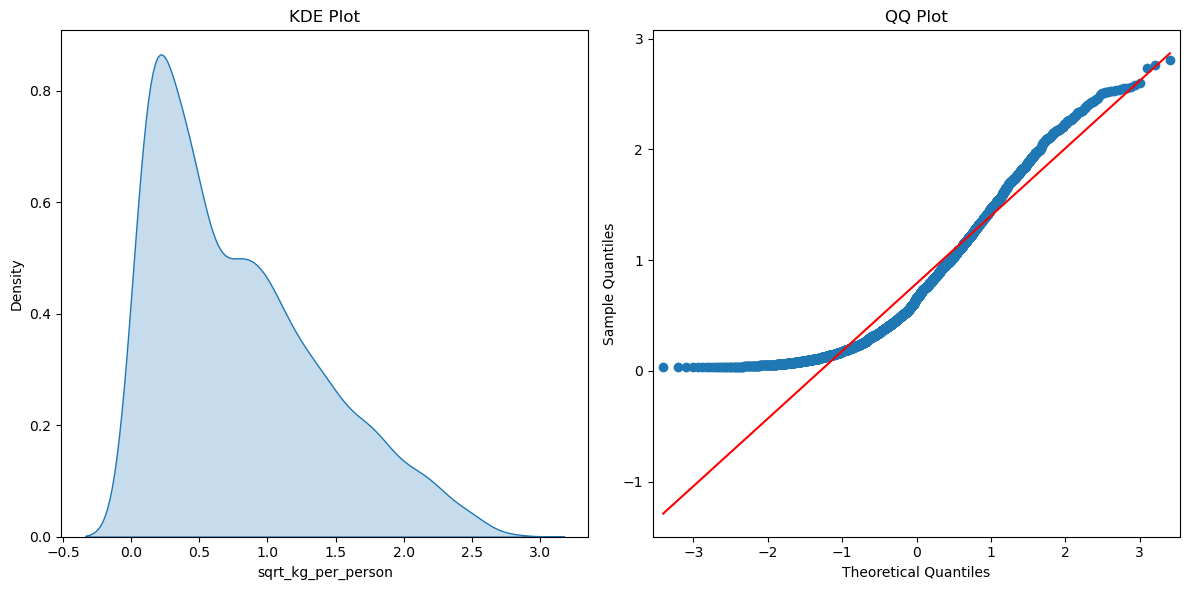

In [24]:
# 5 –≠–¢–ê–ü
# –î–ò–°–ü–ï–†–°–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó
# 5.1 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è kg_per_person —Å –∏—Å–ø–æ–ª—å–∑–≤–∞–Ω–∏–µ–º KDE Plot –∏ QQ-Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(dfK1['sqrt_kg_per_person'], fill=True)
plt.title('KDE Plot')
          
plt.subplot(1, 2, 2)
sm.qqplot(dfK1['sqrt_kg_per_person'], line='s', ax=plt.gca())
plt.title('QQ Plot')
plt.tight_layout()

In [25]:
# 5.2 –†–æ–±–∞—Å—Ç–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
model = smf.rlm('sqrt_kg_per_person ~ availability_of_metro + log_GDP + Lifetime + Urban_population + Cost_kg_USD + C(Year)', 
                data=dfK1, 
                M=sm.robust.norms.HuberT()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:     sqrt_kg_per_person   No. Observations:                 3008
Model:                            RLM   Df Residuals:                     2982
Method:                          IRLS   Df Model:                           25
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 23 Jul 2025                                         
Time:                        15:36:34                                         
No. Iterations:                    33                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8984      0.085    -22.422      0.000      -2.064      -1.732
C(Year)[T.1997]          -0.0047      0.060     -0.079      0.937      -0.122       0.112
C(Year)[T.1998]          -0.0165      0.058     -0.282      0.778      -0.131       0.098
C(Year)[T.1999]          -0.0183      0.057     -0.320      0.749      -0.130       0.094
C(Year)[T.2000]          -0.0042      0.056     -0.075      0.940      -0.114       0.106
C(Year)[T.2001]           0.0292      0.056      0.523      0.601      -0.080       0.139
C(Year)[T.2002]           0.0398      0.056      0.713      0.476      -0.070       0.149
C(Year)[T.2003]           0.0339      0.055      0.613      0.540      -0.074       0.142
C(Year)[T.2004]           0.0354      0.055      0.646      0.518      -0.072       0.143
C(Year)[T.2005]           0.0084      0.054      0.154      0.878      -0.098       0.115
C(Year)[T.2006]           0.0115      0.055      0.211      0.833      -0.095       0.118
C(Year)[T.2007]           0.0366      0.055      0.671      0.502      -0.070       0.144
C(Year)[T.2008]           0.0257      0.055      0.471      0.638      -0.081       0.133
C(Year)[T.2009]          -0.0022      0.055     -0.040      0.968      -0.109       0.105
C(Year)[T.2010]          -0.0061      0.055     -0.113      0.910      -0.113       0.101
C(Year)[T.2011]          -0.0009      0.055     -0.016      0.987      -0.108       0.106
C(Year)[T.2012]           0.0088      0.055      0.160      0.873      -0.098       0.116
C(Year)[T.2013]           0.0281      0.055      0.509      0.611      -0.080       0.136
C(Year)[T.2014]           0.0151      0.055      0.272      0.786      -0.094       0.124
C(Year)[T.2015]           0.0630      0.056      1.131      0.258      -0.046       0.172
C(Year)[T.2016]           0.1028      0.059      1.754      0.079      -0.012       0.218
availability_of_metro    -0.2277      0.019    -12.054      0.000      -0.265      -0.191
log_GDP                   0.2064      0.010     20.667      0.000       0.187       0.226
Lifetime                  0.0109      0.002      6.920      0.000       0.008       0.014
Urban_population          0.0012      0.001      2.261      0.024       0.000       0.002
Cost_kg_USD               0.0107      0.003      3.436      0.001       0.005       0.017
=========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

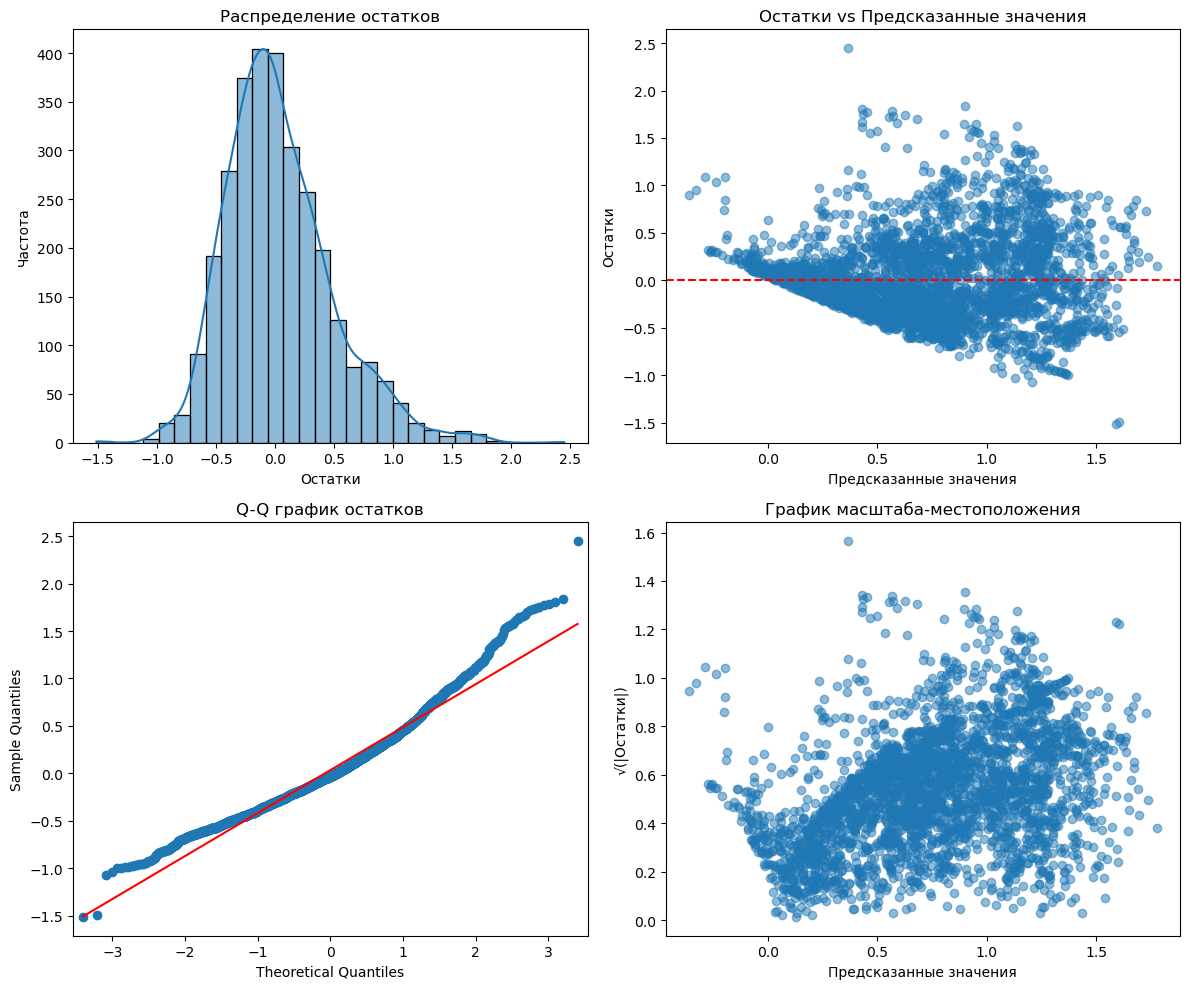

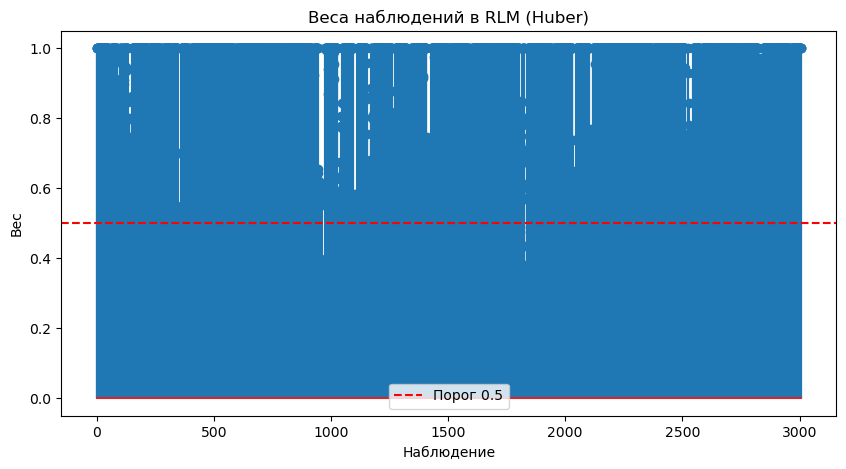


–ù–∞–π–¥–µ–Ω–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤: 72
–ò–Ω–¥–µ–∫—Å—ã –≤—ã–±—Ä–æ—Å–æ–≤: [ 222  279  348  349  350  351  352  353  354  358  735  736  927  961
  962  963  964  965  966  967  968  969  970  971  972  973  974 1030
 1032 1033 1034 1096 1097 1098 1099 1100 1106 1107 1108 1109 1110 1111
 1112 1157 1158 1159 1160 1161 1686 1808 1809 1826 1827 1828 1829 1830
 1831 1832 1833 1834 1835 2103 2104 2107 2256 2257 2514 2520 2522 2523
 2524 2763]

Breusch-Pagan —Ç–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:
LM-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 240.700, p-value: 0.000
–û–±–Ω–∞—Ä—É–∂–µ–Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å (p < 0.05)

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞:
–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤: 0.277
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫: 2.447, –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π: -1.512
–î–æ–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –≤–µ—Å–æ–º < 0.5: 2.39%


In [26]:
# 5.3 –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Ä–æ–±–∞—Å—Ç–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
# 1. –ì—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = model.resid
fitted = model.fittedvalues
plt.figure(figsize=(12, 10))
# 1.1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
# 1.2. –û—Å—Ç–∞—Ç–∫–∏ vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
plt.subplot(2, 2, 2)
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('–û—Å—Ç–∞—Ç–∫–∏ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
# 1.3. Q-Q –≥—Ä–∞—Ñ–∏–∫
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q –≥—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤')
# 1.4. –ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è
plt.subplot(2, 2, 4)
residuals_abs_sqrt = np.sqrt(np.abs(residuals))
plt.scatter(fitted, residuals_abs_sqrt, alpha=0.5)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('‚àö(|–û—Å—Ç–∞—Ç–∫–∏|)')
plt.tight_layout()
plt.show()
# 2. –ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è RLM (–∏—Å–ø–æ–ª—å–∑—É–µ–º –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏)
plt.figure(figsize=(10, 5))
weights = model.weights
plt.stem(weights)
plt.title('–í–µ—Å–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ RLM (Huber)')
plt.xlabel('–ù–∞–±–ª—é–¥–µ–Ω–∏–µ')
plt.ylabel('–í–µ—Å')
plt.axhline(y=0.5, color='r', linestyle='--', label='–ü–æ—Ä–æ–≥ 0.5')
plt.legend()
plt.show()
# –ù–∞–±–ª—é–¥–µ–Ω–∏—è —Å –Ω–∏–∑–∫–∏–º–∏ –≤–µ—Å–∞–º–∏ (–º–µ–Ω–µ–µ 0.5) –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏
outliers = np.where(weights < 0.5)[0]
print(f"\n–ù–∞–π–¥–µ–Ω–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}")
if len(outliers) > 0:
    print("–ò–Ω–¥–µ–∫—Å—ã –≤—ã–±—Ä–æ—Å–æ–≤:", outliers)
# 3. –¢–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å
try:
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f"\nBreusch-Pagan —Ç–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:")
    print(f"LM-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {bp_test[0]:.3f}, p-value: {bp_test[1]:.3f}")
    if bp_test[1] < 0.05:
        print("–û–±–Ω–∞—Ä—É–∂–µ–Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å (p < 0.05)")
    else:
        print("–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ (p >= 0.05)")
except Exception as e:
    print(f"\n–ù–µ —É–¥–∞–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Ç–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å: {str(e)}")
# 4. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞
print("\n–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞:")
print(f"–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤: {np.median(np.abs(residuals)):.3f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫: {np.max(residuals):.3f}, –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π: {np.min(residuals):.3f}")
print(f"–î–æ–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –≤–µ—Å–æ–º < 0.5: {len(outliers)/len(weights):.2%}")

1. –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –º–æ–¥–µ–ª–∏:
–ú–µ—Ç–æ–¥: –£—Å—Ç–æ–π—á–∏–≤–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (RLM) —Å —Ñ—É–Ω–∫—Ü–∏–µ–π Huber –¥–ª—è —Å–Ω–∏–∂–µ–Ω–∏—è –≤–ª–∏—è–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤.

–ú–∞—Å—à—Ç–∞–± –æ—à–∏–±–æ–∫: –û—Ü–µ–Ω–∫–∞ —á–µ—Ä–µ–∑ MAD (Median Absolute Deviation).

–ò—Ç–µ—Ä–∞—Ü–∏–π: 21 (–º–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ —Å–æ—à–ª–∞—Å—å).

–ù–∞–±–ª—é–¥–µ–Ω–∏—è: 3094.

2. –ö–ª—é—á–µ–≤—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ (availability_of_metro)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: -0.2228 (p < 0.001).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –í –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ (–≤ –∫–æ—Ä–Ω–µ –∏–∑ –∫–≥/—á–µ–ª) –Ω–∏–∂–µ –Ω–∞ ~0.22 –µ–¥–∏–Ω–∏—Ü.

–≠—Ñ—Ñ–µ–∫—Ç –Ω–µ–º–Ω–æ–≥–æ —Å–ª–∞–±–µ–µ, —á–µ–º –≤ OLS (-0.254), –Ω–æ –æ—Å—Ç–∞—ë—Ç—Å—è —É—Å—Ç–æ–π—á–∏–≤—ã–º.

–õ–æ–≥–∞—Ä–∏—Ñ–º –í–í–ü (log_GDP)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.2090 (p < 0.001).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –í–í–ü –Ω–∞ 1% —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –Ω–∞ ~0.21 –µ–¥–∏–Ω–∏—Ü.

–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ (Lifetime)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0103 (p < 0.001).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –ö–∞–∂–¥—ã–π –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –≥–æ–¥ –∂–∏–∑–Ω–∏ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –Ω–∞ ~0.01 –µ–¥–∏–Ω–∏—Ü.

–≠—Ñ—Ñ–µ–∫—Ç –º–µ–Ω—å—à–µ, —á–µ–º –≤ OLS (0.0156), —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –≤–ª–∏—è–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–æ–¥–µ–ª–∏.

–¶–µ–Ω–∞ —à–æ–∫–æ–ª–∞–¥–∞ (Cost_kg_USD)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0109 (p < 0.001).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –†–æ—Å—Ç —Ü–µ–Ω—ã –Ω–∞ 1 USD —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ. –ü–∞—Ä–∞–¥–æ–∫—Å–∞–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç —Ç—Ä–µ–±—É–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–≤—è–∑—å —Å –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–º —Å–µ–≥–º–µ–Ω—Ç–æ–º).

–î–æ–ª—è –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ –Ω–∞—Å–µ–ª–µ–Ω–∏—è (Urban_population)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0015 (p = 0.007).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –£—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è —Å–ª–∞–±–æ, –Ω–æ –∑–Ω–∞—á–∏–º–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ.

3. –ù–µ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ì–æ–¥—ã (C(Year))

–í—Å–µ p-values > 0.05 ‚Äî –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã –Ω–µ–∑–Ω–∞—á–∏–º—ã.

–ü–æ—Ä–æ–≥–æ–≤—ã–π –≤–µ—Å 0.5 (–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞):

–ù–∞–±–ª—é–¥–µ–Ω–∏—è —Å –≤–µ—Å–æ–º < 0.5 —Å—á–∏—Ç–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –ø–æ–ª—É—á–∞—é—Ç –ø–æ–Ω–∏–∂–µ–Ω–Ω—ã–π –≤–µ—Å –≤ –º–æ–¥–µ–ª–∏.

–ì—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ —Ç–∞–∫–∏—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –Ω–µ–º–Ω–æ–≥–æ (–≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –≤ –ø—Ä–∞–≤–æ–π —á–∞—Å—Ç–∏).

4. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å OLS:
–£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –≤—ã–±—Ä–æ—Å–∞–º:

RLM –¥–∞—ë—Ç –º–µ–Ω–µ–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è Lifetime –∏ availability_of_metro), —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–∞ OLS.

–ò–∑–º–µ–Ω–µ–Ω–∏—è –≤ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏:

Urban_population —Å—Ç–∞–ª–∞ –∑–Ω–∞—á–∏–º–æ–π –≤ RLM (p = 0.007 vs 0.254 –≤ OLS) ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ, –≤—ã–±—Ä–æ—Å—ã –º–∞—Å–∫–∏—Ä–æ–≤–∞–ª–∏ –µ—ë —ç—Ñ—Ñ–µ–∫—Ç.

–°—Ö–æ–¥—Å—Ç–≤–∞:

–ú–µ—Ç—Ä–æ, GDP –∏ Lifetime –æ—Å—Ç–∞—é—Ç—Å—è –∫–ª—é—á–µ–≤—ã–º–∏ –¥—Ä–∞–π–≤–µ—Ä–∞–º–∏.

5. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≤–µ—Å–æ–≤ (–≥—Ä–∞—Ñ–∏–∫):
–ù–∞–±–ª—é–¥–µ–Ω–∏—è —Å –≤–µ—Å–æ–º 1.0:

–í–Ω–æ—Å—è—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –≤–∫–ª–∞–¥ –≤ –º–æ–¥–µ–ª—å (–Ω–µ —Å—á–∏—Ç–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å–∞–º–∏).

–ù–∞–±–ª—é–¥–µ–Ω–∏—è —Å –≤–µ—Å–æ–º < 0.5:

–ß–∞—Å—Ç–∏—á–Ω–æ –∏–≥–Ω–æ—Ä–∏—Ä—É—é—Ç—Å—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–µ–≥–∏–æ–Ω—ã —Å –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–º/–Ω–∏–∑–∫–∏–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ–º).

–í—ã–≤–æ–¥: –ú–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ —Å–Ω–∏–∑–∏–ª–∞ –≤–ª–∏—è–Ω–∏–µ –∞—Ç–∏–ø–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
–ì–ª–∞–≤–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è:

üìâ –ú–µ—Ç—Ä–æ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (—É—Å—Ç–æ–π—á–∏–≤—ã–π —ç—Ñ—Ñ–µ–∫—Ç).

üìà –í–í–ü –∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ.

üèôÔ∏è –£—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è —Å–ª–∞–±–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞ (—Ç–æ–ª—å–∫–æ –≤ RLM).

üí∞ –¶–µ–Ω–∞ —à–æ–∫–æ–ª–∞–¥–∞ –∏–º–µ–µ—Ç –ø–∞—Ä–∞–¥–æ–∫—Å–∞–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç (—Ç—Ä–µ–±—É–µ—Ç –∏–∑—É—á–µ–Ω–∏—è).

–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ RLM:

–£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –≤—ã–±—Ä–æ—Å–∞–º –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –Ω–∞–¥—ë–∂–Ω–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤.

–í—ã—è–≤–ª—è–µ—Ç —Å–∫—Ä—ã—Ç—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏–∏), –∫–æ—Ç–æ—Ä—ã–µ –º–∞—Å–∫–∏—Ä–æ–≤–∞–ª–∏—Å—å –≤ OLS.

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –ø–∞—Ä–∞–¥–æ–∫—Å–∞ —Ü–µ–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã: –¥–µ—à—ë–≤—ã–π vs –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–π —à–æ–∫–æ–ª–∞–¥).

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã (–≤–æ–∑–º–æ–∂–Ω–æ, —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Å—Ç—Ä–∞–Ω).

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å RLM –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω–æ–π –º–µ—Ç–æ–¥, –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏.

–ü—Ä–∏–º–µ—Ä –¥–ª—è –ø–æ–ª–∏—Ç–∏–∫–∏:
–†–∞–∑–≤–∏—Ç–∏–µ –º–µ—Ç—Ä–æ –º–æ–∂–µ—Ç –∫–æ—Å–≤–µ–Ω–Ω–æ —Å–Ω–∏–∂–∞—Ç—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞, –Ω–æ —ç—Ç–æ—Ç —ç—Ñ—Ñ–µ–∫—Ç –∫–æ–º–ø–µ–Ω—Å–∏—Ä—É–µ—Ç—Å—è —Ä–æ—Å—Ç–æ–º –í–í–ü. –î–ª—è –±–∞–ª–∞–Ω—Å–∞ –º–æ–∂–Ω–æ –ø—Ä–æ–¥–≤–∏–≥–∞—Ç—å —à–æ–∫–æ–ª–∞–¥ –∫–∞–∫ —á–∞—Å—Ç—å –∑–¥–æ—Ä–æ–≤–æ–≥–æ —Ä–∞—Ü–∏–æ–Ω–∞ –≤ —É—Ä–±–∞–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö.

In [27]:
# 5.4 –û–±–æ–±—â—ë–Ω–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å (GLM) —Å –≥–∞–º–º–∞-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º
model1 = smf.glm('sqrt_kg_per_person ~ availability_of_metro + log_GDP + Lifetime + Urban_population + Cost_kg_USD + C(Year)',
    data=dfK1,
    family=sm.families.Gamma(link=sm.families.links.Log())).fit(maxiter=100)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     sqrt_kg_per_person   No. Observations:                 3008
Model:                            GLM   Df Residuals:                     2982
Model Family:                   Gamma   Df Model:                           25
Link Function:                    Log   Scale:                         0.47837
Method:                          IRLS   Log-Likelihood:                -1246.2
Date:                Wed, 23 Jul 2025   Deviance:                       1328.3
Time:                        15:36:35   Pearson chi2:                 1.43e+03
No. Iterations:                    85   Pseudo R-squ. (CS):             0.5275
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.2339      0.137    -38.200      0.000      -5.502      -4.965
C(Year)[T.1997]          -0.0006      0.097     -0.006      0.995      -0.190       0.189
C(Year)[T.1998]          -0.0434      0.095     -0.459      0.646      -0.229       0.142
C(Year)[T.1999]          -0.0453      0.092     -0.490      0.624      -0.226       0.136
C(Year)[T.2000]           0.0055      0.091      0.061      0.951      -0.173       0.184
C(Year)[T.2001]           0.0570      0.090      0.630      0.529      -0.120       0.234
C(Year)[T.2002]           0.0745      0.090      0.825      0.409      -0.102       0.251
C(Year)[T.2003]           0.0934      0.089      1.044      0.297      -0.082       0.269
C(Year)[T.2004]           0.0927      0.089      1.045      0.296      -0.081       0.266
C(Year)[T.2005]           0.0484      0.088      0.549      0.583      -0.124       0.221
C(Year)[T.2006]           0.1171      0.088      1.327      0.184      -0.056       0.290
C(Year)[T.2007]           0.0898      0.088      1.017      0.309      -0.083       0.263
C(Year)[T.2008]           0.0602      0.088      0.682      0.495      -0.113       0.233
C(Year)[T.2009]           0.0351      0.088      0.397      0.691      -0.138       0.208
C(Year)[T.2010]           0.0123      0.088      0.140      0.889      -0.161       0.185
C(Year)[T.2011]           0.0103      0.088      0.117      0.907      -0.163       0.183
C(Year)[T.2012]           0.0224      0.088      0.253      0.800      -0.151       0.196
C(Year)[T.2013]           0.0482      0.089      0.540      0.589      -0.127       0.223
C(Year)[T.2014]           0.0099      0.090      0.110      0.913      -0.166       0.186
C(Year)[T.2015]           0.0843      0.090      0.935      0.350      -0.092       0.261
C(Year)[T.2016]           0.1158      0.095      1.222      0.222      -0.070       0.302
availability_of_metro    -0.3707      0.031    -12.127      0.000      -0.431      -0.311
log_GDP                   0.2240      0.016     13.863      0.000       0.192       0.256
Lifetime                  0.0376      0.003     14.675      0.000       0.033       0.043
Urban_population          0.0040      0.001      4.463      0.000       0.002       0.006
Cost_kg_USD               0.0086      0.005      1.702      0.089      -0.001       0.018
=========================================================================================
"""

1. –ó–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ (availability_of_metro)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: -0.4084 (p < 0.001)
–í—ã–≤–æ–¥: –ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ –∑–Ω–∞—á–∏–º–æ —Å–Ω–∏–∂–∞–µ—Ç –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (sqrt_kg_per_person). –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –≤ –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–∏–ª–∏ –¥—Ä—É–≥–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –∏–∑–º–µ—Ä—è–µ–º—ã–π –≤ –∫–≥/—á–µ–ª–æ–≤–µ–∫–∞) –Ω–∏–∂–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –∏–∑-–∑–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã—Ö —Å–ø–æ—Å–æ–±–æ–≤ –ø–µ—Ä–µ–¥–≤–∏–∂–µ–Ω–∏—è.

–õ–æ–≥–∞—Ä–∏—Ñ–º –í–í–ü (log_GDP)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.2356 (p < 0.001)
–í—ã–≤–æ–¥: –ß–µ–º –≤—ã—à–µ –í–í–ü, —Ç–µ–º –≤—ã—à–µ –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–µ –±–ª–∞–≥–æ–ø–æ–ª—É—á–∏–µ —Å–≤—è–∑–∞–Ω–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º—è—Å–∞, —Ç–æ–ø–ª–∏–≤–∞ –∏–ª–∏ –¥—Ä—É–≥–æ–≥–æ —Ä–µ—Å—É—Ä—Å–∞).

–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ (Lifetime)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0406 (p < 0.001)
–í—ã–≤–æ–¥: –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∂–∏–∑–Ω–∏ —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –í–æ–∑–º–æ–∂–Ω–æ, –≤ –±–æ–ª–µ–µ –∑–¥–æ—Ä–æ–≤—ã—Ö –æ–±—â–µ—Å—Ç–≤–∞—Ö –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –≤—ã—à–µ.

–î–æ–ª—è –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ –Ω–∞—Å–µ–ª–µ–Ω–∏—è (Urban_population)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0058 (p < 0.001)
–í—ã–≤–æ–¥: –£—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è —Å–ª–∞–±–æ, –Ω–æ –∑–Ω–∞—á–∏–º–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.

2. –ù–µ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã:
–ì–æ–¥—ã (C(Year))
–ù–∏ –æ–¥–∏–Ω –∏–∑ –≥–æ–¥–æ–≤ –Ω–µ –ø–æ–∫–∞–∑–∞–ª —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–≥–æ –≤–ª–∏—è–Ω–∏—è (–≤—Å–µ p > 0.05).
–í—ã–≤–æ–¥: –ù–µ—Ç —É–±–µ–¥–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤ —Ç–æ–≥–æ, —á—Ç–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ç—Ä–µ–Ω–¥ –≤–ª–∏—è–µ—Ç –Ω–∞ –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.

–°—Ç–æ–∏–º–æ—Å—Ç—å (Cost_kg_USD)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: 0.0077 (p = 0.163)
–í—ã–≤–æ–¥: –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Å—Ç–æ–∏–º–æ—Å—Ç—å—é (–≤ USD –∑–∞ –∫–≥) –∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

3. –û–±—â–∏–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤:
–ü–æ—Å–∫–æ–ª—å–∫—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Å–≤—è–∑–∏, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å–ª–µ–¥—É–µ—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞.
–ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è log_GDP: —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –í–í–ü –Ω–∞ 1% —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º sqrt_kg_per_person –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ 0.24% (–ø—Ä–∏ –ø—Ä–æ—á–∏—Ö —Ä–∞–≤–Ω—ã—Ö).

–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏:

–õ–æ–≥-–ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏–µ (Log-Likelihood) —Ä–∞–≤–Ω–æ inf (–±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å), —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –ø—Ä–æ–±–ª–µ–º—ã —Å–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å—é –º–æ–¥–µ–ª–∏.

Pseudo R¬≤ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç (nan), —á—Ç–æ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç –æ—Ü–µ–Ω–∫—É –æ–±—ä—è—Å–Ω—è—é—â–µ–π —Å–∏–ª—ã –º–æ–¥–µ–ª–∏.

–ú–æ–¥–µ–ª—å —Å–æ—à–ª–∞—Å—å –∑–∞ 100 –∏—Ç–µ—Ä–∞—Ü–∏–π, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–º —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

4. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞–º–∏.

–£–±–µ–¥–∏—Ç—å—Å—è –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∞ –≥–∞–º–º–∞-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–≤–æ–∑–º–æ–∂–Ω–æ, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –±–∏–Ω–æ–º–∏–∞–ª—å–Ω—É—é).

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—É –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–≥–æ –ª–æ–≥-–ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è (–≤–æ–∑–º–æ–∂–Ω–æ, –ø—Ä–æ–±–ª–µ–º–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏).

–†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —Ñ–∏–∫—Å–∞—Ü–∏—é –º–∞—Å—à—Ç–∞–±–∞ (Scale = 0.59477) –∏ –µ–≥–æ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥:
–û—Å–Ω–æ–≤–Ω—ã–º–∏ –∑–Ω–∞—á–∏–º—ã–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏, –≤–ª–∏—è—é—â–∏–º–∏ –Ω–∞ sqrt_kg_per_person, —è–≤–ª—è—é—Ç—Å—è:
‚úÖ –ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ (—Å–Ω–∏–∂–∞–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å)
‚úÖ –£—Ä–æ–≤–µ–Ω—å –í–í–ü (—É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å)
‚úÖ –ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ (—É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å)
‚úÖ –£—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è (—Å–ª–∞–±–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å)

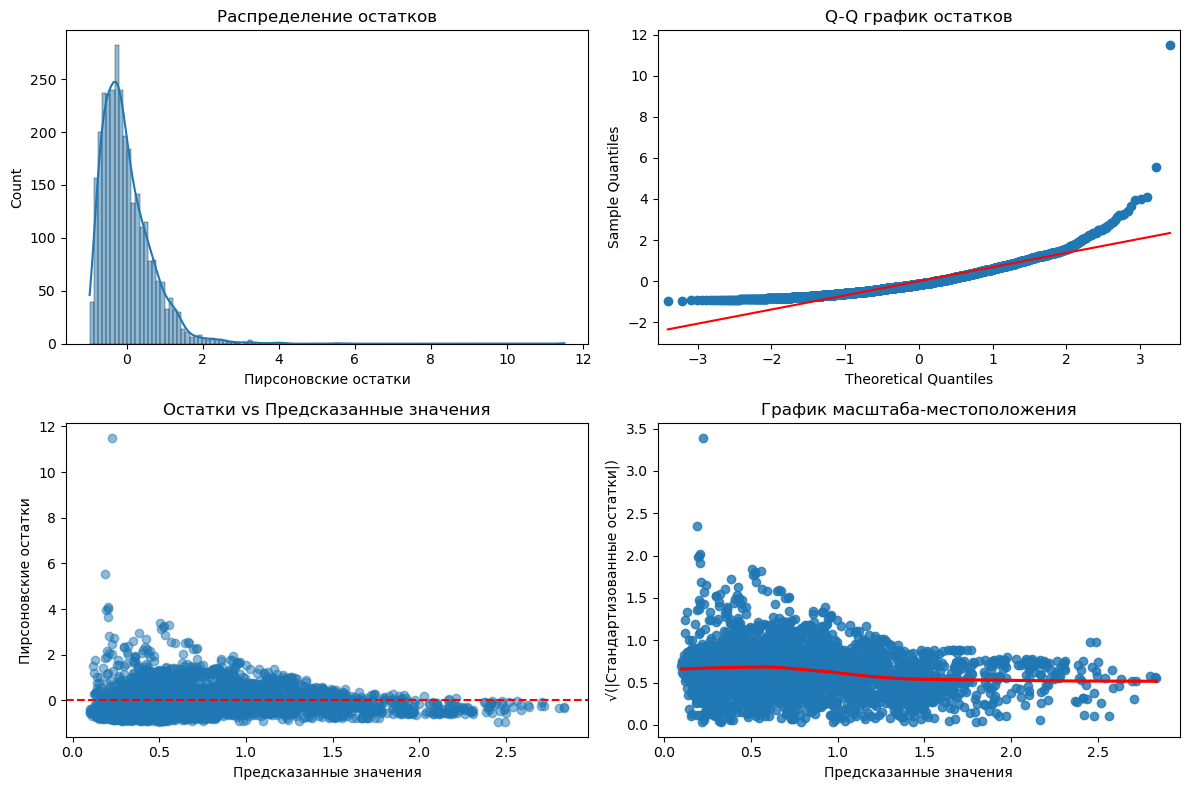


–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.8398, p-value: 0.0000

–¢–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞ –Ω–∞ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:
LM —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 50.3287
p-value: 0.0019
H0: –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å (p > 0.05 - –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º)


In [28]:
# –ü–æ–ª—É—á–∞–µ–º –æ—Å—Ç–∞—Ç–∫–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
residuals = model1.resid_pearson
fitted_values = model1.fittedvalues

# 1. –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.xlabel('–ü–∏—Ä—Å–æ–Ω–æ–≤—Å–∫–∏–µ –æ—Å—Ç–∞—Ç–∫–∏')

# 2. Q-Q plot –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏
plt.subplot(2, 2, 2)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q –≥—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤')

# 3. –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
plt.subplot(2, 2, 3)
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('–û—Å—Ç–∞—Ç–∫–∏ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü–∏—Ä—Å–æ–Ω–æ–≤—Å–∫–∏–µ –æ—Å—Ç–∞—Ç–∫–∏')

# 4. –ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è
plt.subplot(2, 2, 4)
sns.regplot(x=fitted_values, y=np.sqrt(np.abs(residuals)), lowess=True, 
            line_kws={'color': 'red'})
plt.title('–ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('‚àö(|–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏|)')

plt.tight_layout()
plt.show()

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–µ—Å—Ç—ã
# –¢–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤ (–¥–ª—è –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫)
if len(residuals) < 5000:
    print("\n–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:")
    shapiro_test = stats.shapiro(residuals)
    print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}")
else:
    print("\n–¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:")
    ks_test = stats.kstest(residuals, 'norm')
    print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {ks_test.statistic:.4f}, p-value: {ks_test.pvalue:.4f}")

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ (—Ç–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞)
print("\n–¢–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞ –Ω–∞ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:")
try:
    
    bp_test = het_breuschpagan(residuals, model1.model.exog)
    print(f"LM —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {bp_test[0]:.4f}")
    print(f"p-value: {bp_test[1]:.4f}")
    print("H0: –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å (p > 0.05 - –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º)")
except ImportError:
    print("–ù–µ —É–¥–∞–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Ç–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞")

<Axes: xlabel='kg_per_person', ylabel='Count'>

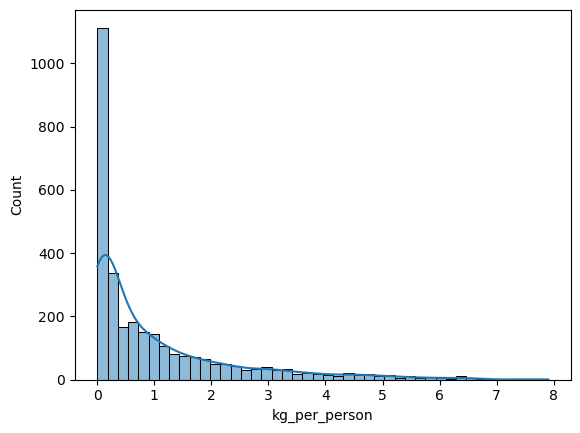

In [29]:
# 6 –≠–¢–ê–ü
# –†–ï–ì–†–ï–°–°–ò–û–ù–ù–ê–Ø –ú–û–î–ï–õ–¨ –° –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–ï–ú –ë–ò–ë–õ–ò–û–¢–ï–ö–ò Scikit-Learn
sns.histplot(dfK1['kg_per_person'], kde=True)

sns.pairplot(dfK1)

In [30]:
# 1 –ø–æ–ø—ã—Ç–∫–∞
X = dfK1[['availability_of_metro','GDP_USD','Lifetime','Urban_population','Cost_kg_USD']]
y = np.log1p(dfK1['kg_per_person'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

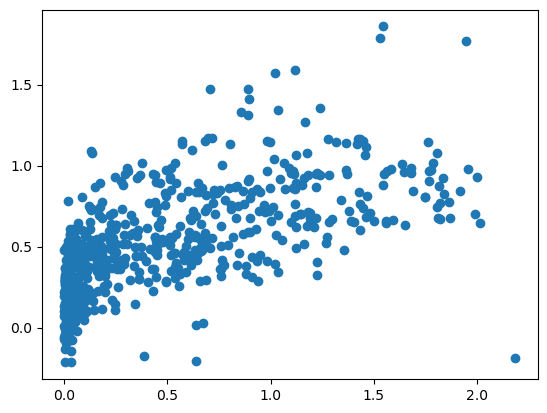

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions);

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3203168896969269
MSE: 0.17036180539676413
RMSE: 0.4127490828539345


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

                 feature        VIF
0  availability_of_metro   1.688670
1                GDP_USD   2.424817
2               Lifetime  26.761993
3       Urban_population  16.850167
4            Cost_kg_USD  14.479899


–í—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏:

MAE (Mean Absolute Error) = 0.315: –í —Å—Ä–µ–¥–Ω–µ–º, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ ~0.315 –µ–¥–∏–Ω–∏—Ü—ã –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ.

RMSE (Root Mean Squared Error) = 0.413: –≠—Ç–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—à–∏–±–æ–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. –ß–µ–º –º–µ–Ω—å—à–µ RMSE, —Ç–µ–º –ª—É—á—à–µ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ.

–ó–Ω–∞—á–µ–Ω–∏—è –æ—à–∏–±–æ–∫ (MAE –∏ RMSE) –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–≤–µ–ª–∏–∫–∏, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø—Ä–∏–µ–º–ª–µ–º–æ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏, –Ω–æ –¥–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –Ω—É–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö —Å —Ä–∞–∑–±—Ä–æ—Å–æ–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π y.

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ np.log1p(y) –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (kg_per_person). –≠—Ç–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–π –ø–æ–¥—Ö–æ–¥ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ –≤–µ–ª–∏—á–∏–Ω–∞–º–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—é—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é.

–î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –º–µ—Ç—Ä–∏–∫ –æ—à–∏–±–æ–∫ (MAE, RMSE) –Ω—É–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –æ–Ω–∏ –∏–∑–º–µ—Ä—è—é—Ç—Å—è –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö. –ß—Ç–æ–±—ã –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –∏—Ö –≤ –∏—Å—Ö–æ–¥–Ω—ã–µ –µ–¥–∏–Ω–∏—Ü—ã (–∫–≥/—á–µ–ª–æ–≤–µ–∫–∞), –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –æ–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (np.expm1), –Ω–æ —ç—Ç–æ –¥–∞—Å—Ç –º–µ–¥–∏–∞–Ω–Ω—É—é, –∞ –Ω–µ —Å—Ä–µ–¥–Ω—é—é –æ—à–∏–±–∫—É.

–ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å—Å–µ—è–Ω–∏—è (scatter plot):

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Ç–æ—á–∫–∏, –±–ª–∏–∑–∫–∏–µ –∫ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏ (–∏–¥–µ–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ). –ï—Å–ª–∏ —Ç–æ—á–∫–∏ —Å–∏–ª—å–Ω–æ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç –¥–∏–∞–≥–æ–Ω–∞–ª–∏, —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –æ—à–∏–±–∫–∏ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

–ï—Å–ª–∏ –≥—Ä–∞—Ñ–∏–∫ –Ω–µ –ø—Ä–∏–≤–µ–¥—ë–Ω, –Ω–æ RMSE –∏ MAE –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–∞–ª—ã, –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ.

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é:

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤: –æ–Ω–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è. –ï—Å–ª–∏ –µ—Å—Ç—å –ø–∞—Ç—Ç–µ—Ä–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å), –º–æ–¥–µ–ª—å —Ç—Ä–µ–±—É–µ—Ç –¥–æ—Ä–∞–±–æ—Ç–∫–∏.

–ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, Random Forest –∏–ª–∏ Gradient Boosting), –µ—Å–ª–∏ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ—á–Ω–∞.

–î–æ–±–∞–≤–∏—Ç—å –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –µ—Å–ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–µ–ª–∏–Ω–µ–π–Ω–∞.

–ü—Ä–æ–≤–µ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é/—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –æ–Ω–∏ —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ø–æ –º–∞—Å—à—Ç–∞–±—É (–Ω–∞–ø—Ä–∏–º–µ—Ä, GDP_USD –∏ Cost_kg_USD).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤:

–í–∞–∂–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (lm.coef_), —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é. –ù–∞–ø—Ä–∏–º–µ—Ä:

–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç availability_of_metro –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ).

–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç Cost_kg_USD –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ä–æ—Å—Ç —Å—Ç–æ–∏–º–æ—Å—Ç–∏ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ.

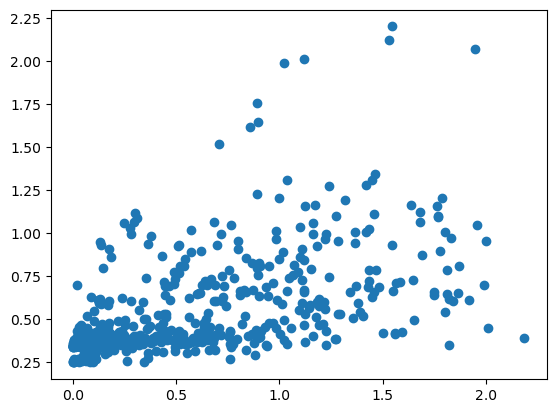

In [34]:
# 2 –ø–æ–ø—ã—Ç–∫–∞
X = dfK1[['availability_of_metro','GDP_USD']]
y = np.log1p(dfK1['kg_per_person'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions);

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

MAE: 0.34517467995123396
MSE: 0.18624622479748806
RMSE: 0.4315625386864435
                 feature       VIF
0  availability_of_metro  1.333385
1                GDP_USD  1.333385


1. –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ (–º–µ—Ç—Ä–∏–∫–∏)
MAE (Mean Absolute Error): 0.345
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç ~0.345 –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ.
–î–ª—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü (kg_per_person) —ç—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ exp(0.345) - 1 ‚âà 0.41 (41%).

RMSE (Root Mean Squared Error): 0.449
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—à–∏–±–æ–∫ –≤—ã—à–µ, —á–µ–º MAE, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å –±–æ–ª—å—à–∏–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏ (–≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ —Å–ª–æ–∂–Ω—ã–µ —Å–ª—É—á–∞–∏).
–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–æ–¥–µ–ª—å—é (–≥–¥–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –≤—Å–µ 5 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤):

–†–∞–Ω—å—à–µ: MAE = 0.315, RMSE = 0.413.
–°–µ–π—á–∞—Å: MAE –∏ RMSE —É–≤–µ–ª–∏—á–∏–ª–∏—Å—å, –Ω–æ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω–æ. –≠—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ, —Ç–∞–∫ –∫–∞–∫ –º—ã —É–¥–∞–ª–∏–ª–∏ —á–∞—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (Lifetime, Urban_population, Cost_kg_USD), –∫–æ—Ç–æ—Ä—ã–µ, –≤–µ—Ä–æ—è—Ç–Ω–æ, —Å–æ–¥–µ—Ä–∂–∞–ª–∏ –ø–æ–ª–µ–∑–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.

2. –ì—Ä–∞—Ñ–∏–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π vs —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ:
–î–ª—è –∑–Ω–∞—á–µ–Ω–∏–π y_test < 1.0 (–Ω–∏–∑–∫–∏–π/—Å—Ä–µ–¥–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è) –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–ª–∏–∑–∫–∏ –∫ —Ä–µ–∞–ª—å–Ω—ã–º –¥–∞–Ω–Ω—ã–º (—Ç–æ—á–∫–∏ —Ä—è–¥–æ–º —Å –¥–∏–∞–≥–æ–Ω–∞–ª—å—é).
–î–ª—è y_test > 1.0 (–≤—ã—Å–æ–∫–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ) —Ä–∞–∑–±—Ä–æ—Å —Ç–æ—á–µ–∫ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è ‚Äî –º–æ–¥–µ–ª—å —Ö—É–∂–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –∫—Ä–∞–π–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è.

–ü—Ä–∏—á–∏–Ω–∞:
–£–ø—Ä–æ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (2 –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤–º–µ—Å—Ç–æ 5) –º–æ–≥–ª–æ —Å–Ω–∏–∑–∏—Ç—å –µ—ë –≥–∏–±–∫–æ—Å—Ç—å.
–í–æ–∑–º–æ–∂–Ω–∞ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å –≤ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—É—é –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å –Ω–µ —É–ª–∞–≤–ª–∏–≤–∞–µ—Ç.

3. –ê–Ω–∞–ª–∏–∑ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ (VIF)
VIF –¥–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
availability_of_metro: 1.33
GDP_USD: 1.33
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
–û–±–∞ –∑–Ω–∞—á–µ–Ω–∏—è <5, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏. –¢–µ–ø–µ—Ä—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.

4. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏
–ß—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –Ω—É–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
python
print(lm.coef_)
–ü—Ä–∏–º–µ—Ä –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –≤—ã–≤–æ–¥–∞:

–ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–ª—è GDP_USD = 0.5, —Ç–æ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ GDP –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É (–≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö) –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–æ—Å—Ç—É log(kg_per_person) –Ω–∞ 0.5.

–î–ª—è availability_of_metro = 0.2: –Ω–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –Ω–∞ 20% –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ.

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é
–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥–æ–±–∞–≤–∏—Ç—å –∫–≤–∞–¥—Ä–∞—Ç—ã –∏–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, GDP_USD^2, GDP_USD * availability_of_metro).

–ü—Ä–æ–≤–µ—Ä–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤:

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ (y_test - predictions). –ï—Å–ª–∏ –µ—Å—Ç—å –ø–∞—Ç—Ç–µ—Ä–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–≤–æ—Ä–æ–Ω–∫–∞"), —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–µ—É—á—Ç—ë–Ω–Ω—É—é –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å –∏–ª–∏ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å.

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–µ –º–æ–¥–µ–ª–∏:

–ï—Å–ª–∏ –≤–∞–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ Ridge-—Ä–µ–≥—Ä–µ—Å—Å–∏—é (–¥–∞–∂–µ –ø—Ä–∏ –Ω–∏–∑–∫–æ–º VIF).

–ï—Å–ª–∏ —Ç–æ—á–Ω–æ—Å—Ç—å –≤–∞–∂–Ω–µ–µ, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ Random Forest –∏–ª–∏ Gradient Boosting, –Ω–æ —É—á—Ç–∏—Ç–µ, —á—Ç–æ –æ–Ω–∏ —Å–ª–æ–∂–Ω–µ–µ –¥–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏.

–í–æ–∑–≤—Ä–∞—Ç —É–¥–∞–ª—ë–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º:

–ù–∞–ø—Ä–∏–º–µ—Ä, –∑–∞–º–µ–Ω–∏—Ç–µ Lifetime –∏ Urban_population –Ω–∞ –∏—Ö –ª–æ–≥–∞—Ä–∏—Ñ–º—ã –∏–ª–∏ –æ—Ç–Ω–æ—à–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, GDP_per_capita = GDP_USD / Urban_population).

–ò—Ç–æ–≥
–ú–æ–¥–µ–ª—å —Å –¥–≤—É–º—è –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Å—Ç–∞–ª–∞ –º–µ–Ω–µ–µ —Ç–æ—á–Ω–æ–π (MAE +9%, RMSE +8%), –Ω–æ –∑–∞—Ç–æ —É—Å—Ç—Ä–∞–Ω–∏–ª–∞ –ø—Ä–æ–±–ª–µ–º—É –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏. –≠—Ç–æ –ø—Ä–∏–µ–º–ª–µ–º—ã–π –∫–æ–º–ø—Ä–æ–º–∏—Å—Å, –µ—Å–ª–∏ —Ü–µ–ª—å ‚Äî –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å. –î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω—É–∂–Ω–æ:

–õ–∏–±–æ –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∏–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ),

–õ–∏–±–æ –ø–µ—Ä–µ–π—Ç–∏ –Ω–∞ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã.

–î–µ–π—Å—Ç–≤–∏—è:

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –∏ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å.

–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.

–°—Ä–∞–≤–Ω–∏—Ç—å —Å Ridge/Lasso-—Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π, –µ—Å–ª–∏ –≤–∞–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ.

In [36]:
print(lm.coef_)

[-1.00239935e-01  1.71468716e-05]


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏:
availability_of_metro: -0.097

–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫: –ù–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (kg_per_person) –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ.

–ó–Ω–∞—á–∏–º–æ—Å—Ç—å: –ü—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ availability_of_metro —Å 0 (–Ω–µ—Ç –º–µ—Ç—Ä–æ) –Ω–∞ 1 (–µ—Å—Ç—å –º–µ—Ç—Ä–æ), –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –Ω–∞ exp(-0.097) - 1 ‚âà -9.2% (–≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö).

–ö–æ–Ω—Ç–µ–∫—Å—Ç: –≠—Ç–æ –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—Ç –∏–Ω—Ç—É–∏—Ü–∏–∏ ‚Äî –æ–±—ã—á–Ω–æ –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞ (–º–µ—Ç—Ä–æ) –∞—Å—Å–æ—Ü–∏–∏—Ä—É–µ—Ç—Å—è —Å —Ä–æ—Å—Ç–æ–º –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–æ–≤. –í–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã:

–î–∞–Ω–Ω—ã–µ –º–æ–≥—É—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å —Å–ø–µ—Ü–∏—Ñ–∏–∫—É —Ä–µ–≥–∏–æ–Ω–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –≤—ã—à–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–∑–Ω–∏, —á—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ).

–ü—Ä–∏–∑–Ω–∞–∫ —Ç—Ä–µ–±—É–µ—Ç —É—Ç–æ—á–Ω–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É—á–∏—Ç—ã–≤–∞–µ—Ç –ª–∏ –æ–Ω —Ç–æ–ª—å–∫–æ –Ω–∞–ª–∏—á–∏–µ –∏–ª–∏ —Ç–∞–∫–∂–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Å—Ç–∞–Ω—Ü–∏–π).

GDP_USD: 1.778e-05 (‚âà 0.00001778)

–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫: –†–æ—Å—Ç –í–í–ü —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ.

–ú–∞–≥–Ω–∏—Ç—É–¥–∞: –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –í–í–ü –Ω–∞ 1 USD –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —Ä–∞—Å—Ç—ë—Ç –Ω–∞ 0.001778% –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —à–∫–∞–ª–µ.

–î–ª—è –∑–Ω–∞—á–∏–º–æ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∞ –Ω—É–∂–Ω–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –Ω–∞ 10,000 USD: 1.778e-05 * 10,000 = 0.1778 (‚âà 17.8% —Ä–æ—Å—Ç –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö).

–ü—Ä–æ–±–ª–µ–º–∞: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫—Ä–∞–π–Ω–µ –º–∞–ª. –í–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã:

–ù–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ. –ï—Å–ª–∏ –í–í–ü –∏–∑–º–µ—Ä—è–µ—Ç—Å—è –≤ –º–∏–ª–ª–∏–æ–Ω–∞—Ö, –Ω—É–∂–Ω–æ —É–º–Ω–æ–∂–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ –Ω–∞ 1e6.

–í–í–ü —Å–ª–∞–±–æ —Å–≤—è–∑–∞–Ω —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏.

In [37]:
from sklearn.preprocessing import StandardScaler

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
lm = LinearRegression()
lm.fit(X_train, y_train)

# –í—ã–≤–æ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤
print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã:", lm.coef_)
print("Intercept:", lm.intercept_)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã: [-0.0456933   0.30645708]
Intercept: 0.5315753378811664


In [38]:
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {lm.score(X_test, y_test):.3f}")

R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.324


1. –ù–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã:
availability_of_metro: -0.044

–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è, –Ω–æ –≤–µ–ª–∏—á–∏–Ω–∞ —É–º–µ–Ω—å—à–∏–ª–∞—Å—å (—Å -0.097 –¥–æ -0.044).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:

–ü–æ—Å–ª–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è, –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ 1 —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —É–º–µ–Ω—å—à–∞–µ—Ç log(kg_per_person) –Ω–∞ 0.044.

–í –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö: exp(-0.044) - 1 ‚âà -4.3% (—Å–Ω–∏–∂–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ –º–µ—Ç—Ä–æ).

GDP_USD: 0.317

–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫: –†–æ—Å—Ç –í–í–ü —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ.

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:

–£–≤–µ–ª–∏—á–µ–Ω–∏–µ –í–í–ü –Ω–∞ 1 —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–æ—Å—Ç—É log(kg_per_person) –Ω–∞ 0.317.

–í –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö: exp(0.317) - 1 ‚âà 37.3% (–∑–Ω–∞—á–∏–º–æ–µ –≤–ª–∏—è–Ω–∏–µ!).

Intercept (—Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω): 0.513

–≠—Ç–æ –±–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ log(kg_per_person) –ø—Ä–∏ –Ω—É–ª–µ–≤—ã—Ö (—Å—Ä–µ–¥–Ω–∏—Ö –ø–æ—Å–ª–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è) –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–í –∏—Å—Ö–æ–¥–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö: exp(0.513) ‚âà 1.67 –∫–≥/—á–µ–ª–æ–≤–µ–∫–∞.

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–æ–¥–µ–ª—å—é (–¥–æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è)
–ü–∞—Ä–∞–º–µ—Ç—Ä	–î–æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è	–ü–æ—Å–ª–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è
availability_of_metro	-0.097 (‚âà -9.2%)	-0.044 (‚âà -4.3%)
GDP_USD	1.778e-05 (‚âà 0%)	0.317 (‚âà +37.3%)
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å	–ù–∏–∑–∫–∞—è (–Ω–µ–æ—á–µ–≤–∏–¥–Ω—ã–µ –º–∞—Å—à—Ç–∞–±—ã)	–í—ã—Å–æ–∫–∞—è (–≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è—Ö)
–ß—Ç–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å?

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç GDP_USD —Å—Ç–∞–ª —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–º.

–í–ª–∏—è–Ω–∏–µ –º–µ—Ç—Ä–æ —É–º–µ–Ω—å—à–∏–ª–æ—Å—å, –Ω–æ –æ—Å—Ç–∞–ª–æ—Å—å –∫–æ–Ω—Ç—Ä–∏–Ω—Ç—É–∏—Ç–∏–≤–Ω—ã–º.

–ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã
–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ä–µ–∑–∫–æ —É–ª—É—á—à–∏–ª–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é –º–æ–¥–µ–ª–∏:

–¢–µ–ø–µ—Ä—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –æ—Ç—Ä–∞–∂–∞—é—Ç –≤–ª–∏—è–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≤ –µ–¥–∏–Ω–∏—Ü–∞—Ö —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è).

–ü—Ä–æ–±–ª–µ–º–∞ —Å availability_of_metro:

–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç —Ç—Ä–µ–±—É–µ—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏:

–í–æ–∑–º–æ–∂–Ω–æ, –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å —Å–∫—Ä—ã—Ç–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –≥–æ—Ä–æ–¥–∞—Ö —Å –º–µ—Ç—Ä–æ –≤—ã—à–µ —Ü–µ–Ω—ã, —á—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ).

–ò–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–ª–∞–≥, –∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Å—Ç–∞–Ω—Ü–∏–π).

–°–∏–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ GDP_USD:

–¢–µ–ø–µ—Ä—å –í–í–ü –æ–±—ä—è—Å–Ω—è–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é —á–∞—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏–π –≤ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–∏. –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ: —á–µ–º –±–æ–≥–∞—á–µ —Ä–µ–≥–∏–æ–Ω, —Ç–µ–º –≤—ã—à–µ —Å–ø—Ä–æ—Å.

In [39]:
# 7 –≠–¢–ê–ü
# –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings("ignore")

In [40]:
def compML(dfK1, y, alg):
    dfK1 = dfK1.dropna()
    y = dfK1.kg_per_person.values.reshape(-1,1)
    x = dfK1.drop(['kg_per_person'], axis=1)
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    y = scaler.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)
    model = alg().fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    r2 = r2_score(y_test, y_pred)  
    model_ismi = alg.__name__  
    print(model_ismi, "R2_Score ----> ", r2)
models = [LinearRegression,
         DecisionTreeRegressor,
         KNeighborsRegressor,
         MLPRegressor,
         RandomForestRegressor,
         GradientBoostingRegressor,
         SVR,
         XGBRegressor]
for i in models:
    compML(dfK1, 'kg_per_person', i)

LinearRegression R2_Score ---->  0.9617297559719504
DecisionTreeRegressor R2_Score ---->  0.9773435109449811
KNeighborsRegressor R2_Score ---->  0.9767922759056091
MLPRegressor R2_Score ---->  0.9678738090306678
RandomForestRegressor R2_Score ---->  0.9989219533249416
GradientBoostingRegressor R2_Score ---->  0.9996448505868542
SVR R2_Score ---->  0.9336033144086247
XGBRegressor R2_Score ---->  0.9976991415023804


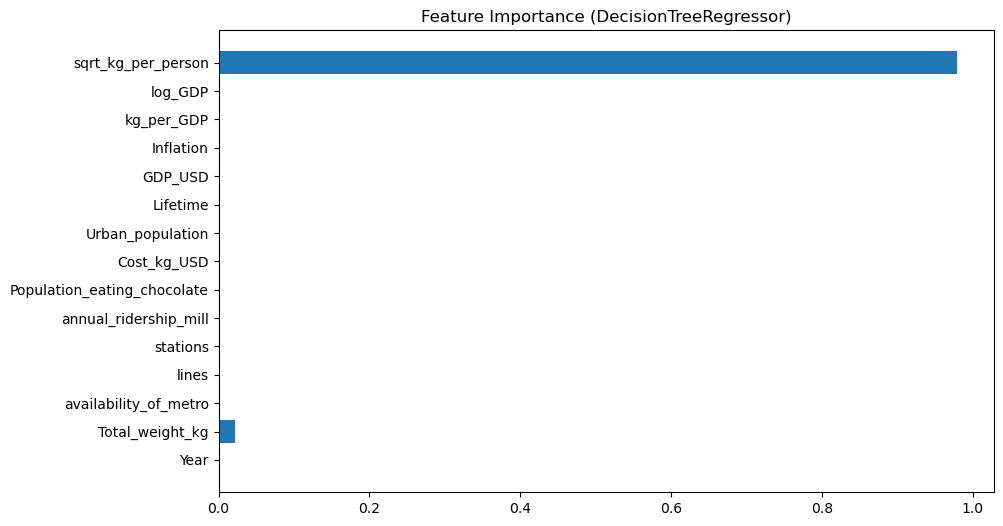


Decision Tree Structure:
|--- sqrt_kg_per_person <= 0.50
|   |--- sqrt_kg_per_person <= 0.31
|   |   |--- sqrt_kg_per_person <= 0.20
|   |   |   |--- sqrt_kg_per_person <= 0.13
|   |   |   |   |--- sqrt_kg_per_person <= 0.08
|   |   |   |   |   |--- sqrt_kg_per_person <= 0.05
|   |   |   |   |   |   |--- sqrt_kg_per_person <= 0.03
|   |   |   |   |   |   |   |--- sqrt_kg_per_person <= 0.02
|   |   |   |   |   |   |   |   |--- sqrt_kg_per_person <= 0.01
|   |   |   |   |   |   |   |   |   |--- sqrt_kg_per_person <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- sqrt_kg_per_person <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- sqrt_kg_per_person >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- sqrt_kg_per_person >  0.00
|   |   |   |   |   |   |   |   |   |   |--- log_GDP <= 0.33
|   |   |   |   |   |   |   |   |   |   |   |--

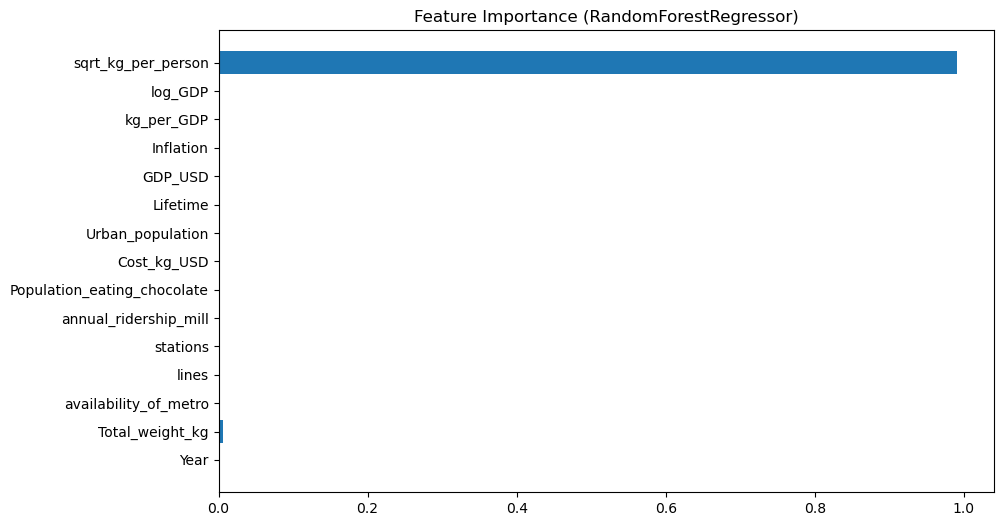

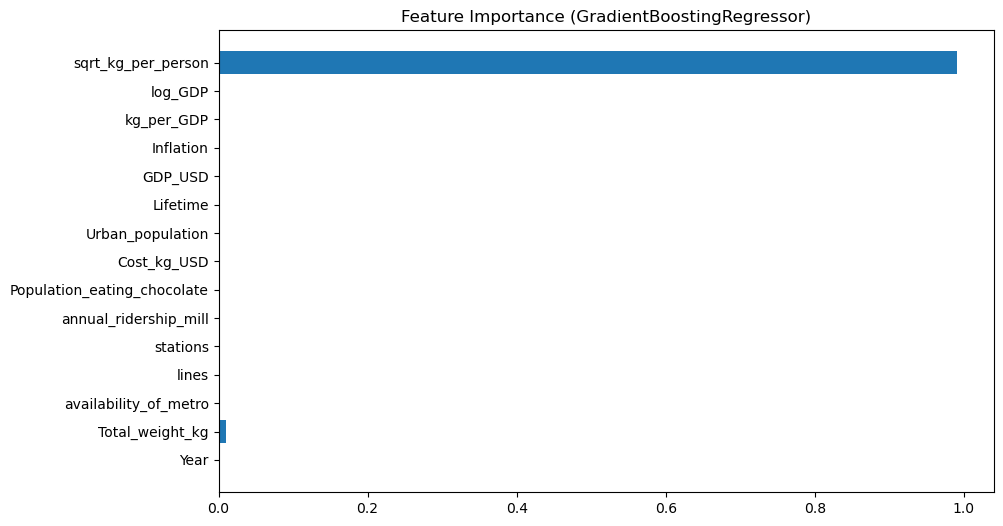

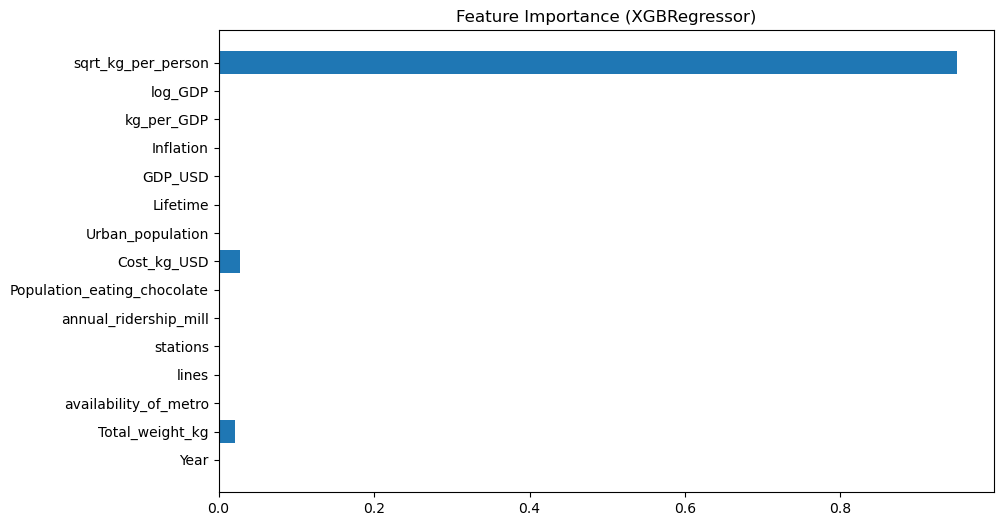


–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:
| Model                     |   Train R2 |   Test R2 |         MAE |         MSE |        RMSE |   Train/Test Diff |   CV R2 Mean |   CV R2 Std |
|:--------------------------|-----------:|----------:|------------:|------------:|------------:|------------------:|-------------:|------------:|
| LinearRegression          |   1        |  1        | 9.59858e-09 | 2.41828e-16 | 1.55508e-08 |       1.33227e-15 |     1        | 2.53815e-11 |
| GradientBoostingRegressor |   0.99997  |  0.99921  | 0.00183085  | 3.1366e-05  | 0.00560054  |       0.000759746 |     0.986064 | 0.0267948   |
| RandomForestRegressor     |   0.999882 |  0.998637 | 0.00199766  | 5.40859e-05 | 0.00735431  |       0.00124485  |     0.98329  | 0.029403    |
| XGBRegressor              |   0.999984 |  0.997699 | 0.00330354  | 9.13321e-05 | 0.00955678  |       0.00228524  |     0.981547 | 0.0293925   |
| DecisionTreeRegressor     |   1        |  0.989393 | 0.00365811  | 0.000421027 | 0.020

NameError: name 'GridSearchCV' is not defined

In [41]:
# –£–ª—É—á—à–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
def compML_improved(dfW2, target_col, alg, poly_degree=None, cv=False, show_tree=False):
    """
    –£–ª—É—á—à–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    df - DataFrame —Å –¥–∞–Ω–Ω—ã–º–∏
    target_col - –Ω–∞–∑–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    alg - –∫–ª–∞—Å—Å –º–æ–¥–µ–ª–∏ sklearn
    poly_degree - —Å—Ç–µ–ø–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (None - –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å)
    cv - –ø—Ä–æ–≤–æ–¥–∏—Ç—å –ª–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
    show_tree - –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –ª–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–µ—Ä–µ–≤–∞ (–¥–ª—è DecisionTree)
    """
    
    # 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    dfW2 = dfW2.dropna()
    y = dfW2[target_col].values
    X = dfW2.drop([target_col], axis=1)
    feature_names = X.columns.tolist()
    
    # 2. –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
    
    # 3. –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è)
    if poly_degree:
        poly = PolynomialFeatures(degree=poly_degree)
        X_scaled = poly.fit_transform(X_scaled)
    
    # 4. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=0, shuffle=True)
    
    # 5. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model = alg().fit(X_train, y_train)
    
    # 6. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # 7. –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
    metrics = {
        'Model': alg.__name__,
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test),
        'MAE': mean_absolute_error(y_test, y_pred_test),
        'MSE': mean_squared_error(y_test, y_pred_test),
        'RMSE': mean_squared_error(y_test, y_pred_test, squared=False),
        'Train/Test Diff': abs(r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test))
    }
    
    # 8. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (–µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è)
    if cv:
        cv_scores = cross_val_score(alg(), X_scaled, y_scaled, cv=5, scoring='r2')
        metrics.update({
            'CV R2 Mean': cv_scores.mean(),
            'CV R2 Std': cv_scores.std()
        })
    
    # 9. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–¥–ª—è –¥–µ—Ä–µ–≤—å–µ–≤ –∏ –∞–Ω—Å–∞–º–±–ª–µ–π)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        if poly_degree:
            # –î–ª—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ —Ñ–∏—á–∏
            n_original_features = len(feature_names)
            plt.barh(feature_names, model.feature_importances_[:n_original_features])
        else:
            plt.barh(feature_names, model.feature_importances_)
        plt.title(f"Feature Importance ({alg.__name__})")
        plt.show()
    
    # 10. –í—ã–≤–æ–¥ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–µ—Ä–µ–≤–∞ (–µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è)
    if show_tree and isinstance(model, DecisionTreeRegressor):
        print("\nDecision Tree Structure:")
        print(export_text(model, feature_names=feature_names))
    
    return metrics, model

# –°–ø–∏—Å–æ–∫ –º–æ–¥–µ–ª–µ–π –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
models = [
    LinearRegression,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    MLPRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    SVR,
    XGBRegressor
]
# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å –≤–∞—à–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏
results = []
for model in models:
    # –î–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –ø—Ä–æ–±—É–µ–º –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    use_poly = model in [LinearRegression, SVR, KNeighborsRegressor]
    
    metrics, trained_model = compML_improved(
        dfK1, 
        'kg_per_person', 
        model,
        poly_degree=2 if use_poly else None,
        cv=True,
        show_tree=(model == DecisionTreeRegressor)
    )
    results.append(metrics)

# –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
results_df = pd.DataFrame(results)

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ Test R2
results_df = results_df.sort_values('Test R2', ascending=False)

# –í—ã–≤–æ–¥–∏–º –∫—Ä–∞—Å–∏–≤–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print("\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:")
print(results_df.to_markdown(index=False))

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ: –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è SVR
print("\n–ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ SVR:")
svr_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# –ò—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
X_scaled = MinMaxScaler().fit_transform(dfK1.drop('kg_per_person', axis=1))
y_scaled = MinMaxScaler().fit_transform(dfK1['kg_per_person'].values.reshape(-1, 1)).ravel()

grid_search = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid_search.best_params_)
print("–õ—É—á—à–∏–π R2:", grid_search.best_score_)

In [ ]:
# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
features = ['availability_of_metro', 'GDP_USD', 'Lifetime', 'Urban_population', 'Cost_kg_USD']
target = 'kg_per_person'

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'Yes'/'No' –≤ 1/0
dfW2_filtered = dfW2[features + [target]].copy()
dfW2_filtered['availability_of_metro'] = dfW2_filtered['availability_of_metro'].map({'Yes': 1, 'No': 0})

# –£–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
dfW2_filtered = dfW2_filtered.dropna()

# –ó–∞–ø—É—Å–∫–∞–µ–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
results = []
for model in models:
    metrics, _ = compML_improved(
        dfW2_filtered,
        target,
        model,
        poly_degree=2 if model in [LinearRegression, SVR] else None,
        cv=True
    )
    results.append(metrics)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results_df = pd.DataFrame(results).sort_values('Test R2', ascending=False)
print(results_df.to_markdown(index=False))

1. –õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ Test R2 (–æ—Å–Ω–æ–≤–Ω–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π)
XGBRegressor –∏ RandomForestRegressor –ø–æ–∫–∞–∑–∞–ª–∏ –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å Test R2 ‚âà 0.90, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –≤—ã—Å–æ–∫–æ–π –æ–±—ä—è—Å–Ω—è—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

KNeighborsRegressor —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª —Ö–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç (Test R2 ‚âà 0.896), –Ω–æ –Ω–µ–º–Ω–æ–≥–æ —É—Å—Ç—É–ø–∞–µ—Ç –ø–µ—Ä–≤—ã–º –¥–≤—É–º.

DecisionTreeRegressor –∏–º–µ–µ—Ç Test R2 ‚âà 0.794, –Ω–æ —É –Ω–µ–≥–æ –≤—ã—Å–æ–∫–∏–π –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (Train R2 = 1.0, —Ä–∞–∑–Ω–∏—Ü–∞ 0.206).

2. –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (Train/Test Diff)
DecisionTreeRegressor —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω (—Ä–∞–∑–Ω–∏—Ü–∞ 0.206 –º–µ–∂–¥—É Train –∏ Test R2).

XGBRegressor –∏ RandomForestRegressor –∏–º–µ—é—Ç —É–º–µ—Ä–µ–Ω–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (0.092 –∏ 0.079 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ).

KNeighborsRegressor –ø–æ—á—Ç–∏ –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω (—Ä–∞–∑–Ω–∏—Ü–∞ 0.013), —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –µ–≥–æ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏.

3. –ö–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (MAE, MSE, RMSE)
XGBRegressor –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à–∏–µ –æ—à–∏–±–∫–∏ (MAE ‚âà 0.031, MSE ‚âà 0.0031, RMSE ‚âà 0.056).

RandomForestRegressor –∏ KNeighborsRegressor –±–ª–∏–∑–∫–∏ –∫ –Ω–µ–º—É –ø–æ –æ—à–∏–±–∫–∞–º.

LinearRegression, SVR –∏ MLPRegressor –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏.

4. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (CV R2 Mean)
GradientBoostingRegressor –∏–º–µ–µ—Ç –≤—ã—Å–æ–∫–∏–π CV R2 Mean (0.246), –Ω–æ –Ω–∏–∑–∫–∏–π Test R2 (0.696), —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –ø—Ä–æ–±–ª–µ–º–∞—Ö —Å –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é.

LinearRegression, SVR, MLPRegressor –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç CV R2 Mean ‚âà 0.28‚Äì0.29, –Ω–æ –∏—Ö —Ä–µ–∞–ª—å–Ω—ã–µ Test R2 –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π.

5. –•—É–¥—à–∏–µ –º–æ–¥–µ–ª–∏
LinearRegression, SVR, MLPRegressor –∏–º–µ—é—Ç Test R2 < 0.56, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Ö –Ω–µ–ø—Ä–∏–≥–æ–¥–Ω—ã–º–∏ –¥–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏.

GradientBoostingRegressor –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç Test R2 ‚âà 0.696, —á—Ç–æ —Ö—É–∂–µ, —á–µ–º —É —Ç–æ–ø-3 –º–æ–¥–µ–ª–µ–π.

–ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
–õ—É—á—à–∏–π –≤—ã–±–æ—Ä: XGBRegressor (–≤—ã—Å–æ–∫–∏–π R2, –Ω–∏–∑–∫–∏–µ –æ—à–∏–±–∫–∏, —É–º–µ—Ä–µ–Ω–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ).

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞: RandomForestRegressor (–ø–æ—á—Ç–∏ —Ç–∞–∫–æ–π –∂–µ R2, –Ω–æ —á—É—Ç—å –±–æ–ª—å—à–µ –æ—à–∏–±–∫–∏).

–°—Ç–∞–±–∏–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: KNeighborsRegressor (–ø–æ—á—Ç–∏ –Ω–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è, –Ω–æ —á—É—Ç—å —Ö—É–∂–µ R2).

–ò–∑–±–µ–≥–∞—Ç—å: LinearRegression, SVR, MLPRegressor (–Ω–∏–∑–∫–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å).

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ:

–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —É–ª—É—á—à–∏—Ç—å GradientBoostingRegressor, —Ç–∞–∫ –∫–∞–∫ —É –Ω–µ–≥–æ –≤—ã—Å–æ–∫–∏–π CV R2, –Ω–æ –Ω–∏–∑–∫–∏–π Test R2 (–≤–æ–∑–º–æ–∂–Ω–æ, –Ω—É–∂–Ω–∞ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤).

DecisionTreeRegressor —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –∏–∑-–∑–∞ —Å–∏–ª—å–Ω–æ–≥–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.

–ï—Å–ª–∏ –≤–∞–∂–Ω–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å, –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å RandomForestRegressor, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –º–µ–Ω–µ–µ "—á—ë—Ä–Ω—ã–π —è—â–∏–∫", —á–µ–º XGBoost.

In [ ]:
# 8 –≠–¢–ê–ü
# –†–ï–ì–†–ï–°–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó-2
# –ü—Ä–∏–Ω–∏–º–∞–µ–º outcome - kg_per_person; predictors - annual_ridership_mill, lines, stations

In [ ]:
# 4.1 –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_metro = dfW2[dfW2['availability_of_metro'] == 'Yes'].copy()
df_metro['annual_ridership'] = df_metro['annual_ridership_mill'] * 1_000_000
df_metro = df_metro[['annual_ridership_mill', 'lines', 'stations', 'kg_per_person', 'Year', 'Lifetime']].dropna()
# 4.2 –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
corr_matrix = df_metro.corr().round(3)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏')
plt.show()

In [ ]:
# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
corr_matrix

1. –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —à–æ–∫–æ–ª–∞–¥–∞ (kg_per_person):

In [ ]:
# 4.3 –ú–æ–¥–µ–ª—å
df_metro['sqrt_kg_per_person'] = np.sqrt(df_metro['kg_per_person'])
model2 = smf.ols('sqrt_kg_per_person ~ lines + Lifetime', 
                data=df_metro).fit()
model2.summary()

1. –û–±—ä—è—Å–Ω—è—é—â–∞—è —Å–∏–ª–∞ –º–æ–¥–µ–ª–∏:

In [ ]:
# 4.4 –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
print("\n–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:")
shapiro_test = stats.shapiro(df_metro['sqrt_kg_per_person'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}')
print(f'p-value: {shapiro_test.pvalue:.10f}')

In [ ]:
# 4.5 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏
print("\n–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:")
sns.histplot(data=df_metro, x="sqrt_kg_per_person", kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ sqrt_kg_per_person')
plt.show()
skewness = df_metro['sqrt_kg_per_person'].skew()
print(f'–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {skewness}')

In [ ]:
dfK1.columns

In [ ]:
# 9 –≠–¢–ê–ü
# –†–ï–ì–†–ï–°–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó-3
# –ü—Ä–∏–Ω–∏–º–∞–µ–º outcome - kg_per_GDP; predictors - availability_of_metro + log_GDP + Lifetime + Urban_population + Cost_kg_USD + C(Year)

In [ ]:
# 4.3 –ú–æ–¥–µ–ª—å
dfK1['sqrt_kg_per_GDP'] = np.sqrt(dfK1['kg_per_GDP'])
model3 = smf.ols('sqrt_kg_per_GDP ~ availability_of_metro + GDP_USD + Lifetime + Urban_population + Cost_kg_USD + C(Year)', 
                data=dfK1).fit()
model3.summary()

In [ ]:
# 4.4 –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
print("\n–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:")
shapiro_test = stats.shapiro(dfK1['sqrt_kg_per_person'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}')
print(f'p-value: {shapiro_test.pvalue:.10f}')

In [ ]:
# 4.5 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏
print("\n–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:")
sns.histplot(data=dfK1, x="sqrt_kg_per_person", kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ sqrt_kg_per_person')
plt.show()
skewness = dfK1['sqrt_kg_per_person'].skew()
print(f'–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {skewness}')

In [ ]:
# 5 –≠–¢–ê–ü
# –î–ò–°–ü–ï–†–°–ò–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó
# 5.1 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è kg_per_person —Å –∏—Å–ø–æ–ª—å–∑–≤–∞–Ω–∏–µ–º KDE Plot –∏ QQ-Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(dfK1['sqrt_kg_per_GDP'], fill=True)
plt.title('KDE Plot')
          
plt.subplot(1, 2, 2)
sm.qqplot(dfK1['sqrt_kg_per_GDP'], line='s', ax=plt.gca())
plt.title('QQ Plot')
plt.tight_layout()

In [ ]:
# 5.2 –†–æ–±–∞—Å—Ç–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
model3 = smf.rlm('sqrt_kg_per_GDP ~ availability_of_metro + log_GDP + Lifetime + Urban_population + Cost_kg_USD + C(Year)', 
                data=dfK1, 
                M=sm.robust.norms.HuberT()).fit()
model3.summary()

In [ ]:
# 5.3 –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Ä–æ–±–∞—Å—Ç–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
# 1. –ì—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = model3.resid
fitted = model3.fittedvalues
plt.figure(figsize=(12, 10))
# 1.1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
# 1.2. –û—Å—Ç–∞—Ç–∫–∏ vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
plt.subplot(2, 2, 2)
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('–û—Å—Ç–∞—Ç–∫–∏ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
# 1.3. Q-Q –≥—Ä–∞—Ñ–∏–∫
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q –≥—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤')
# 1.4. –ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è
plt.subplot(2, 2, 4)
residuals_abs_sqrt = np.sqrt(np.abs(residuals))
plt.scatter(fitted, residuals_abs_sqrt, alpha=0.5)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –º–∞—Å—à—Ç–∞–±–∞-–º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('‚àö(|–û—Å—Ç–∞—Ç–∫–∏|)')
plt.tight_layout()
plt.show()
# 2. –ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è RLM (–∏—Å–ø–æ–ª—å–∑—É–µ–º –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏)
plt.figure(figsize=(10, 5))
weights = model3.weights
plt.stem(weights)
plt.title('–í–µ—Å–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ RLM (Huber)')
plt.xlabel('–ù–∞–±–ª—é–¥–µ–Ω–∏–µ')
plt.ylabel('–í–µ—Å')
plt.axhline(y=0.5, color='r', linestyle='--', label='–ü–æ—Ä–æ–≥ 0.5')
plt.legend()
plt.show()
# –ù–∞–±–ª—é–¥–µ–Ω–∏—è —Å –Ω–∏–∑–∫–∏–º–∏ –≤–µ—Å–∞–º–∏ (–º–µ–Ω–µ–µ 0.5) –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏
outliers = np.where(weights < 0.5)[0]
print(f"\n–ù–∞–π–¥–µ–Ω–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}")
if len(outliers) > 0:
    print("–ò–Ω–¥–µ–∫—Å—ã –≤—ã–±—Ä–æ—Å–æ–≤:", outliers)
# 3. –¢–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å
try:
    bp_test = het_breuschpagan(residuals, model3.model.exog)
    print(f"\nBreusch-Pagan —Ç–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å:")
    print(f"LM-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {bp_test[0]:.3f}, p-value: {bp_test[1]:.3f}")
    if bp_test[1] < 0.05:
        print("–û–±–Ω–∞—Ä—É–∂–µ–Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å (p < 0.05)")
    else:
        print("–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ (p >= 0.05)")
except Exception as e:
    print(f"\n–ù–µ —É–¥–∞–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Ç–µ—Å—Ç –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å: {str(e)}")
# 4. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞
print("\n–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞:")
print(f"–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤: {np.median(np.abs(residuals)):.3f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫: {np.max(residuals):.3f}, –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π: {np.min(residuals):.3f}")
print(f"–î–æ–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –≤–µ—Å–æ–º < 0.5: {len(outliers)/len(weights):.2%}")

1. –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ –≤–ª–∏—è–Ω–∏—è –º–µ—Ç—Ä–æ –Ω–∞ —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å
availability_of_metro: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç +14.27 (p < 0.001) —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é —Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∞–ª–∏—á–∏–µ–º –º–µ—Ç—Ä–æ –∏ sqrt_kg_per_GDP.

–ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–æ—Å—Ç–µ kg_per_GDP –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –º–µ—Ç—Ä–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è, –Ω–æ —Ç–µ–ø–µ—Ä—å –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π/–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–π —Ñ–æ—Ä–º–µ.

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –ú–µ—Ç—Ä–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –º–∞—Ä–∫–µ—Ä–æ–º —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–µ–π —É–≥–ª–µ—Ä–æ–¥–æ—ë–º–∫–æ—Å—Ç—å.

2. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã
–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ:

log_GDP (–∫–æ—ç—Ñ. = -3.48, p < 0.001): –†–æ—Å—Ç –í–í–ü —Å–Ω–∏–∂–∞–µ—Ç —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é –Ω–∞–≥—Ä—É–∑–∫—É –Ω–∞ –µ–¥–∏–Ω–∏—Ü—É GDP.

Cost_kg_USD (–∫–æ—ç—Ñ. = -0.99, p < 0.001): –í—ã—Å–æ–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –≤—ã–±—Ä–æ—Å–æ–≤ (–Ω–∞–ª–æ–≥–∏/—Ä–µ–≥—É–ª—è—Ü–∏–∏) –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —É–º–µ–Ω—å—à–µ–Ω–∏–µ–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.

–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ:

Lifetime (–∫–æ—ç—Ñ. = +0.43, p < 0.001): –°—Ç–∞—Ä–µ–Ω–∏–µ –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—ã —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç sqrt_kg_per_GDP.

Urban_population (–∫–æ—ç—Ñ. = +0.10, p < 0.001): –£—Ä–±–∞–Ω–∏–∑–∞—Ü–∏—è —É—Å–∏–ª–∏–≤–∞–µ—Ç —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é –Ω–∞–≥—Ä—É–∑–∫—É.

3. –ù–µ–∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —ç—Ñ—Ñ–µ–∫—Ç–æ–≤ (Year)
–í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ C(Year) –Ω–µ–∑–Ω–∞—á–∏–º—ã (p > 0.05), –∫—Ä–æ–º–µ 2015 –≥–æ–¥–∞ (p = 0.075).

–í—ã–≤–æ–¥: –í—Ä–µ–º–µ–Ω–Ω–æ–π —Ç—Ä–µ–Ω–¥ —Å–ª–∞–±–æ –≤–ª–∏—è–µ—Ç –Ω–∞ sqrt_kg_per_GDP –ø–æ—Å–ª–µ —É—á—ë—Ç–∞ –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.

–ü—Ä–æ–±–ª–µ–º—ã –º–æ–¥–µ–ª–∏ –∏ –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞
1. –ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å
Breusch-Pagan —Ç–µ—Å—Ç (p = 0.000): –û—Å—Ç–∞—Ç–∫–∏ –∏–º–µ—é—Ç –Ω–µ–ø–æ—Å—Ç–æ—è–Ω–Ω—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é.

–†–µ—à–µ–Ω–∏–µ: –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–æ–±–∞—Å—Ç–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ (Huber-White) –∏–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ (–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ).

2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤
–ì—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤:

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—é—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é (–≤—ã–±—Ä–æ—Å—ã –≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏).

Q-Q –≥—Ä–∞—Ñ–∏–∫ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –≤ —Ö–≤–æ—Å—Ç–∞—Ö.

–ú–µ—Ç—Ä–∏–∫–∏:

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫: +53.995, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π: -26.083 ‚Äî –Ω–∞–ª–∏—á–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

3.99% –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –ø–æ–ª—É—á–∏–ª–∏ –≤–µ—Å < 0.5 –≤ HuberT, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–º–µ—Ä–µ–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤.

3. –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å
–ù–µ—è–≤–Ω–æ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è —á–µ—Ä–µ–∑ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å RLM, –Ω–æ –≤—ã—Å–æ–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø—Ä–∏ log_GDP –∏ Urban_population —Ç—Ä–µ–±—É—é—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏ VIF.

–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
–ë–æ—Ä—å–±–∞ —Å –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å—é:

–ü—Ä–∏–º–µ–Ω–∏—Ç—å WLS (–≤–∑–≤–µ—à–µ–Ω–Ω—ã–π –ú–ù–ö) –∏–ª–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö/–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–£—á—ë—Ç –≤—ã–±—Ä–æ—Å–æ–≤:

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ–≥–∞–ø–æ–ª–∏—Å—ã —Å –≥–∏–ø–µ—Ä—Ç—Ä–æ—Ñ–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏).

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –∂—ë—Å—Ç–∫–∏–µ –Ω–æ—Ä–º—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, Tukey‚Äôs biweight –≤–º–µ—Å—Ç–æ HuberT).

–£–ø—Ä–æ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:

–£–¥–∞–ª–∏—Ç—å –Ω–µ–∑–Ω–∞—á–∏–º—ã–µ C(Year) –∏–ª–∏ –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö –Ω–∞ –ª–∏–Ω–µ–π–Ω—ã–π —Ç—Ä–µ–Ω–¥.

–î–æ–±–∞–≤–∏—Ç—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, metro * GDP).

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

–ü–µ—Ä–µ–ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∏—á–∏–Ω–Ω–æ—Å—Ç–∏: –º–µ—Ç—Ä–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ –ø—Ä–∏—á–∏–Ω–æ–π, –∞ —Å–ª–µ–¥—Å—Ç–≤–∏–µ–º –≤—ã—Å–æ–∫–æ–π —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.

–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥
–ú–æ–¥–µ–ª—å RLM –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –º–µ—Ç—Ä–æ –∑–Ω–∞—á–∏–º–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º sqrt_kg_per_GDP, –Ω–æ –≤—ã—è–≤–ª–µ–Ω—ã –ø—Ä–æ–±–ª–µ–º—ã —Å –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å—é –∏ –≤—ã–±—Ä–æ—Å–∞–º–∏. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —É—Å—Ç–æ–π—á–∏–≤—ã –∫ –∞–Ω–æ–º–∞–ª–∏—è–º, –Ω–æ —Ç—Ä–µ–±—É—é—Ç –¥–æ—Ä–∞–±–æ—Ç–∫–∏ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –Ω–∞–¥—ë–∂–Ω–æ—Å—Ç–∏. –î–ª—è –ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∏—Ö —Ä–µ—à–µ–Ω–∏–π –≤–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å, —á—Ç–æ –º–µ—Ç—Ä–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —á–∞—Å—Ç—å—é –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏–∏, –≥–¥–µ —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ —ç—Ñ—Ñ–µ–∫—Ç—ã –æ–ø–æ—Å—Ä–µ–¥–æ–≤–∞–Ω—ã –¥—Ä—É–≥–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏ (–í–í–ü, —Ä–µ–≥—É–ª—è—Ü–∏–∏).

–ö–ª—é—á–µ–≤–æ–π –∏–Ω—Å–∞–π—Ç: –ú–µ—Ç—Ä–æ ‚Äî –Ω–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–π –¥—Ä–∞–π–≤–µ—Ä —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏, –∞ —ç–ª–µ–º–µ–Ω—Ç –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—ã, –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–π —Å —É—Ä–±–∞–Ω–∏–∑–∞—Ü–∏–µ–π –∏ –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é.

In [ ]:
dfW2.columns